In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from Bio import SeqIO
import sys
sys.path.insert(0, '../models/')
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, CSVLogger
from tensorflow.keras.regularizers import L2
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from tensorflow_addons.layers import GroupNormalization

import numpy as np
import h5py
import scipy.io
np.random.seed(1337) # for reproducibility

from tensorflow.keras.layers import Input, Conv1D, Dense, LSTM, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation, AveragePooling1D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

from random import shuffle
#from pyfasta import Fasta
import gzip
import numpy as np
import re
import random


2025-01-25 11:17:43.697288: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-25 11:17:43.713277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-25 11:17:43.732079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-25 11:17:43.737552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 11:17:43.751272: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num GPUs Available:  1
Num of GPUs available:  13


2025-01-25 11:17:46.566169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 14167 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:17:00.0, compute capability: 8.6


In [3]:
######################################## Chr6 Negative-1

Chromosome #  16
##########################################################
Negative #  1
##########################################################


2025-01-25 11:17:47.525587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14167 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:17:00.0, compute capability: 8.6


20294 2001 4
(20294, 2001, 4) (20294, 1, 1024) (20294,)
(20294, 2001, 4) (20294, 1, 1024) (20294, 1)
(20294, 2001, 4) (20294, 1, 1024) (20294, 1)
(16235, 2001, 4) (4059, 2001, 4)
(16235, 2001, 4) (4059, 2001, 4)
(16235, 2001, 4) (4059, 2001, 4)
(16235, 2001, 4) (4059, 2001, 4)
(16236, 2001, 4) (4058, 2001, 4)
(16235, 1, 1024) (4059, 1, 1024)
(16235, 1, 1024) (4059, 1, 1024)
(16235, 1, 1024) (4059, 1, 1024)
(16235, 1, 1024) (4059, 1, 1024)
(16236, 1, 1024) (4058, 1, 1024)
Training on Fold:  1


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2001, 64)  │      5,952 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 133, 64)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 133, 64)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 133, 128)  │    270,464 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 8, 128)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 8, 128)    │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 64)     │     65,600 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1088)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1088)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      1,089 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70


I0000 00:00:1737826597.363535 3688071 service.cc:146] XLA service 0x7fd1e0004e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737826597.363567 3688071 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-01-25 11:36:37.416816: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-25 11:36:39.325343: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 30/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5109 - loss: 2.5025

I0000 00:00:1737826603.435009 3688071 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5285 - loss: 1.7114
Epoch 1: val_loss improved from inf to 1.20014, saving model to Chr16/sec_folds_1/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5286 - loss: 1.7099 - val_accuracy: 0.5969 - val_loss: 1.2001 - learning_rate: 0.0010
0.001
Epoch 2/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5863 - loss: 1.1516
Epoch 2: val_loss improved from 1.20014 to 1.00150, saving model to Chr16/sec_folds_1/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5864 - loss: 1.1514 - val_accuracy: 0.6452 - val_loss: 1.0015 - learning_rate: 0.0010
0.001
Epoch 3/70
195/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6538 - loss: 0.9523
Epoch 3: val_loss improved from 1.00150 to 0.82569, saving model to Chr16/sec_folds_1/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6542 - loss: 0.9505 - val_accuracy: 0.7204 - val_loss: 0.8257 - learning_rate: 0.0010
0.001
Epoch 4/70
19

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2001, 64)  │      5,952 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 133, 64)   │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 133, 64)   │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 133, 128)  │    270,464 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 8, 128)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 8, 128)    │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 64)     │     65,600 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1024)      │          0 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1088)      │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 1088)      │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,089 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5242 - loss: 1.7896
Epoch 1: val_loss improved from inf to 1.20892, saving model to Chr16/sec_folds_1/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5244 - loss: 1.7879 - val_accuracy: 0.5836 - val_loss: 1.2089 - learning_rate: 0.0010
0.001
Epoch 2/70
197/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6108 - loss: 1.1607
Epoch 2: val_loss improved from 1.20892 to 0.99563, saving model to Chr16/sec_folds_1/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6112 - loss: 1.1589 - val_accuracy: 0.6883 - val_loss: 0.9956 - learning_rate: 0.0010
0.001
Epoch 3/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6729 - loss: 0.9520
Epoch 3: val_loss improved from 0.99563 to 0.82630, saving model to Chr16/sec_folds_1/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6729 - loss: 0.9518 - val_accuracy: 0.7250 - val_loss: 0.8263 - learning_rate: 0.0010
0

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 2001, 64)  │      5,952 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 133, 64)   │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 133, 64)   │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 133, 128)  │    270,464 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 8, 128)    │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 8, 128)    │          0 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1, 64)     │     65,600 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1024)      │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 1088)      │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 1088)      │          0 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,089 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5278 - loss: 1.7062
Epoch 1: val_loss improved from inf to 1.19626, saving model to Chr16/sec_folds_1/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5279 - loss: 1.7047 - val_accuracy: 0.5932 - val_loss: 1.1963 - learning_rate: 0.0010
0.001
Epoch 2/70
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5838 - loss: 1.1516
Epoch 2: val_loss improved from 1.19626 to 0.99763, saving model to Chr16/sec_folds_1/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5839 - loss: 1.1511 - val_accuracy: 0.6184 - val_loss: 0.9976 - learning_rate: 0.0010
0.001
Epoch 3/70
197/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6281 - loss: 0.9587
Epoch 3: val_loss improved from 0.99763 to 0.82844, saving model to Chr16/sec_folds_1/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6286 - loss: 0.9572 - val_accuracy: 0.7003 - val_loss: 0.8284 - learning_rate: 0.0010
0.

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 2001, 64)  │      5,952 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 133, 64)   │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 133, 64)   │          0 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 133, 128)  │    270,464 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 8, 128)    │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 8, 128)    │          0 │ max_pooling1d_7[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1, 64)     │     65,600 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 1024)      │          0 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 1088)      │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 1088)      │          0 │ concatenate_3[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      1,089 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5242 - loss: 1.6625
Epoch 1: val_loss improved from inf to 1.20384, saving model to Chr16/sec_folds_1/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5242 - loss: 1.6612 - val_accuracy: 0.5885 - val_loss: 1.2038 - learning_rate: 0.0010
0.001
Epoch 2/70
193/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5933 - loss: 1.1515
Epoch 2: val_loss improved from 1.20384 to 0.98324, saving model to Chr16/sec_folds_1/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5945 - loss: 1.1485 - val_accuracy: 0.6769 - val_loss: 0.9832 - learning_rate: 0.0010
0.001
Epoch 3/70
199/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6639 - loss: 0.9385
Epoch 3: val_loss improved from 0.98324 to 0.82437, saving model to Chr16/sec_folds_1/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6641 - loss: 0.9375 - val_accuracy: 0.7050 - val_loss: 0.8244 - learning_rate: 0.0010
0.0

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 2001, 64)  │      5,952 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_8     │ (None, 133, 64)   │          0 │ conv1d_8[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 133, 64)   │          0 │ max_pooling1d_8[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 133, 128)  │    270,464 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 8, 128)    │          0 │ conv1d_9[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 8, 128)    │          0 │ max_pooling1d_9[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1, 64)     │     65,600 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 1024)      │          0 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 1088)      │          0 │ flatten_8[0][0],  │
│ (Concatenate)       │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 1088)      │          0 │ concatenate_4[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │      1,089 │ dropout_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5351 - loss: 1.6564
Epoch 1: val_loss improved from inf to 1.20140, saving model to Chr16/sec_folds_1/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5352 - loss: 1.6551 - val_accuracy: 0.5640 - val_loss: 1.2014 - learning_rate: 0.0010
0.001
Epoch 2/70
194/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6035 - loss: 1.1441
Epoch 2: val_loss improved from 1.20140 to 0.96208, saving model to Chr16/sec_folds_1/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6045 - loss: 1.1411 - val_accuracy: 0.6878 - val_loss: 0.9621 - learning_rate: 0.0010
0.001
Epoch 3/70
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6645 - loss: 0.9283
Epoch 3: val_loss improved from 0.96208 to 0.78752, saving model to Chr16/sec_folds_1/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6646 - loss: 0.9279 - val_accuracy: 0.7251 - val_loss: 0.7875 - learning_rate: 0.0010
0.0

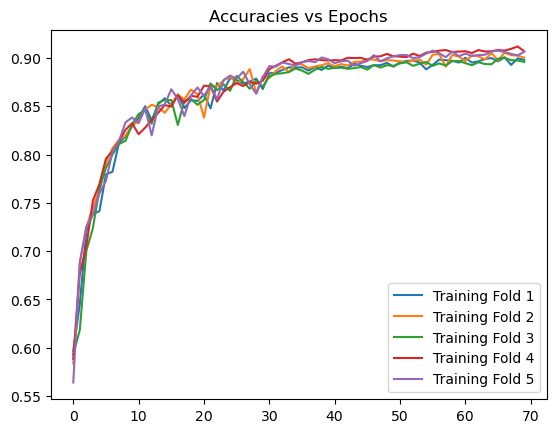

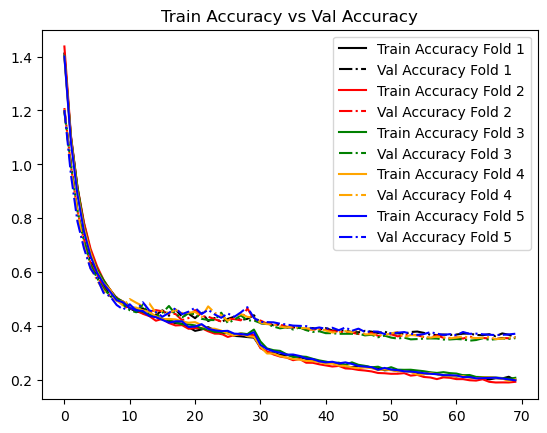

Result on val_Fold:  1
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9022 - loss: 0.3433
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8974 - loss: 0.3749
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9084 - loss: 0.3393
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.3504
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8863 - loss: 0.4201
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
################################## Trianing Performance of Chr# and Neg# 16 1
Average Accuracy: 0.9014 ± 0.0058
Average Sensitivity: 0.9125 ± 0.0151
Average Specificity: 0.8910 ± 0.0114
Average MCC: 0.8033 ± 0.0113
Average ROC AUC: 0.9538 ± 0.0029
Average PR AUC: 0.9516 ± 0.0035
#########################

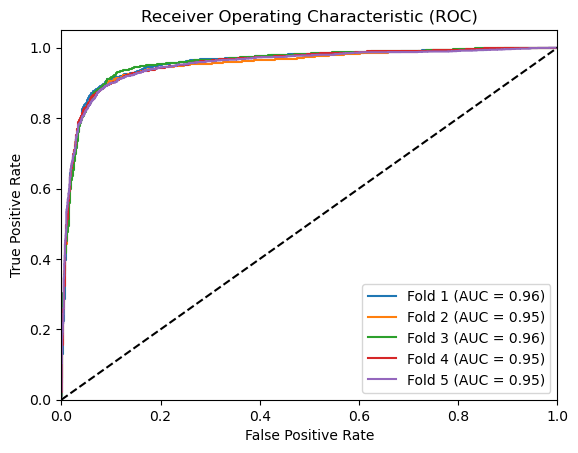

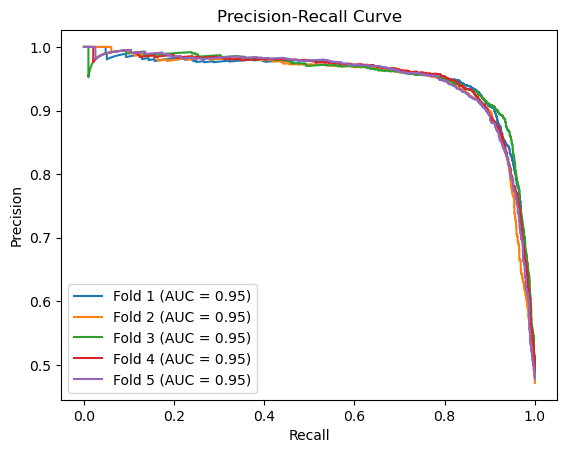

3266 2001 4
Result on val_Fold:  1
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Result on val_Fold:  2
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  5
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 16 1
Average Accuracy: 0.8153 ± 0.0123
Average Sensitivity: 0.5281 ± 0.0250
Average Specificity: 0.8779 ± 0.0134
Average MCC: 0.3929 ± 0.0281
Average AUC-ROC: 0.7828 ± 0.0166
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Negative #  2
##########################################################
20294 2001 4
(20294, 2001, 4) (20294, 1, 1024) (20294,)
(20294, 2001, 4) (20294, 1, 1024) (20294, 1)
(20294, 2001, 4) (20294, 1, 1024) (20294, 1)
(16235, 2001, 4) (4059, 2001, 4)
(16235, 2001, 4) (4059, 2001, 4)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 133, 64)   │          0 │ conv1d_10[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 133, 64)   │          0 │ max_pooling1d_10… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 8, 128)    │          0 │ conv1d_11[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 8, 128)    │          0 │ max_pooling1d_11… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 1024)      │          0 │ dropout_16[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 1088)      │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 1088)      │          0 │ concatenate_5[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │      1,089 │ dropout_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5161 - loss: 1.7993
Epoch 1: val_loss improved from inf to 1.20101, saving model to Chr16/sec_folds_2/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5162 - loss: 1.7976 - val_accuracy: 0.5941 - val_loss: 1.2010 - learning_rate: 0.0010
0.001
Epoch 2/70
193/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5944 - loss: 1.1567
Epoch 2: val_loss improved from 1.20101 to 1.01156, saving model to Chr16/sec_folds_2/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5954 - loss: 1.1538 - val_accuracy: 0.6144 - val_loss: 1.0116 - learning_rate: 0.0010
0.001
Epoch 3/70
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6639 - loss: 0.9491
Epoch 3: val_loss improved from 1.01156 to 0.84792, saving model to Chr16/sec_folds_2/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6641 - loss: 0.9487 - val_accuracy: 0.6908 - val_loss: 0.8479 - learning_rate: 0.0010
0.0

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_12    │ (None, 133, 64)   │          0 │ conv1d_12[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 133, 64)   │          0 │ max_pooling1d_12… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_13    │ (None, 8, 128)    │          0 │ conv1d_13[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 8, 128)    │          0 │ max_pooling1d_13… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 1024)      │          0 │ dropout_19[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 64)        │          0 │ dense_12[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 1088)      │          0 │ flatten_12[0][0], │
│ (Concatenate)       │                   │            │ flatten_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 1088)      │          0 │ concatenate_6[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │      1,089 │ dropout_20[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5377 - loss: 1.5858
Epoch 1: val_loss improved from inf to 1.17503, saving model to Chr16/sec_folds_2/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5378 - loss: 1.5847 - val_accuracy: 0.5885 - val_loss: 1.1750 - learning_rate: 0.0010
0.001
Epoch 2/70
193/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5973 - loss: 1.1177
Epoch 2: val_loss improved from 1.17503 to 0.95906, saving model to Chr16/sec_folds_2/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5974 - loss: 1.1150 - val_accuracy: 0.6249 - val_loss: 0.9591 - learning_rate: 0.0010
0.001
Epoch 3/70
194/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6252 - loss: 0.9178
Epoch 3: val_loss improved from 0.95906 to 0.79506, saving model to Chr16/sec_folds_2/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6258 - loss: 0.9158 - val_accuracy: 0.6865 - val_loss: 0.7951 - learning_rate: 0.0010
0.0

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_14    │ (None, 133, 64)   │          0 │ conv1d_14[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 133, 64)   │          0 │ max_pooling1d_14… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_15    │ (None, 8, 128)    │          0 │ conv1d_15[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 8, 128)    │          0 │ max_pooling1d_15… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 1024)      │          0 │ dropout_22[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 64)        │          0 │ dense_14[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 1088)      │          0 │ flatten_14[0][0], │
│ (Concatenate)       │                   │            │ flatten_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 1088)      │          0 │ concatenate_7[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │      1,089 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5398 - loss: 1.7009
Epoch 1: val_loss improved from inf to 1.21244, saving model to Chr16/sec_folds_2/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5399 - loss: 1.6995 - val_accuracy: 0.5907 - val_loss: 1.2124 - learning_rate: 0.0010
0.001
Epoch 2/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5905 - loss: 1.1658
Epoch 2: val_loss improved from 1.21244 to 0.99609, saving model to Chr16/sec_folds_2/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5909 - loss: 1.1641 - val_accuracy: 0.6446 - val_loss: 0.9961 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6609 - loss: 0.9496
Epoch 3: val_loss improved from 0.99609 to 0.81497, saving model to Chr16/sec_folds_2/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6611 - loss: 0.9484 - val_accuracy: 0.7151 - val_loss: 0.8150 - learning_rate: 0.0010
0.0

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_16    │ (None, 133, 64)   │          0 │ conv1d_16[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 133, 64)   │          0 │ max_pooling1d_16… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_24[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 8, 128)    │          0 │ conv1d_17[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 8, 128)    │          0 │ max_pooling1d_17… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 1024)      │          0 │ dropout_25[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 64)        │          0 │ dense_16[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 1088)      │          0 │ flatten_16[0][0], │
│ (Concatenate)       │                   │            │ flatten_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 1088)      │          0 │ concatenate_8[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │      1,089 │ dropout_26[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5330 - loss: 1.6648
Epoch 1: val_loss improved from inf to 1.20007, saving model to Chr16/sec_folds_2/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5331 - loss: 1.6635 - val_accuracy: 0.5969 - val_loss: 1.2001 - learning_rate: 0.0010
0.001
Epoch 2/70
200/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6183 - loss: 1.1450
Epoch 2: val_loss improved from 1.20007 to 0.98014, saving model to Chr16/sec_folds_2/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6183 - loss: 1.1441 - val_accuracy: 0.6689 - val_loss: 0.9801 - learning_rate: 0.0010
0.001
Epoch 3/70
195/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6579 - loss: 0.9470
Epoch 3: val_loss improved from 0.98014 to 0.81444, saving model to Chr16/sec_folds_2/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6584 - loss: 0.9451 - val_accuracy: 0.7179 - val_loss: 0.8144 - learning_rate: 0.0010
0.0

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_18    │ (None, 133, 64)   │          0 │ conv1d_18[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 133, 64)   │          0 │ max_pooling1d_18… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_19    │ (None, 8, 128)    │          0 │ conv1d_19[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 8, 128)    │          0 │ max_pooling1d_19… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_19[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 1024)      │          0 │ dropout_28[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 64)        │          0 │ dense_18[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 1088)      │          0 │ flatten_18[0][0], │
│ (Concatenate)       │                   │            │ flatten_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 1088)      │          0 │ concatenate_9[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │      1,089 │ dropout_29[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5275 - loss: 1.7553
Epoch 1: val_loss improved from inf to 1.21177, saving model to Chr16/sec_folds_2/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5276 - loss: 1.7537 - val_accuracy: 0.6068 - val_loss: 1.2118 - learning_rate: 0.0010
0.001
Epoch 2/70
195/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5884 - loss: 1.1668
Epoch 2: val_loss improved from 1.21177 to 1.00437, saving model to Chr16/sec_folds_2/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5890 - loss: 1.1646 - val_accuracy: 0.6709 - val_loss: 1.0044 - learning_rate: 0.0010
0.001
Epoch 3/70
193/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6242 - loss: 0.9789
Epoch 3: val_loss improved from 1.00437 to 0.85987, saving model to Chr16/sec_folds_2/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6251 - loss: 0.9767 - val_accuracy: 0.7112 - val_loss: 0.8599 - learning_rate: 0.0010
0.0

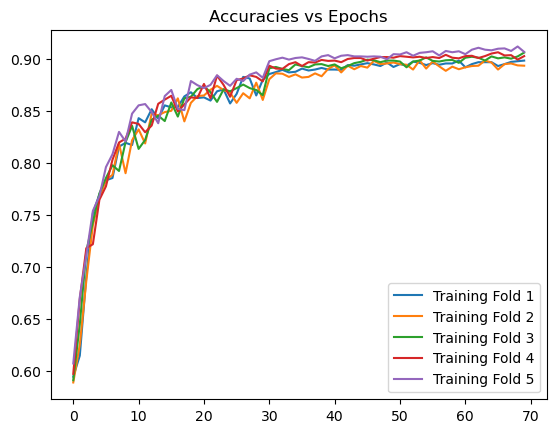

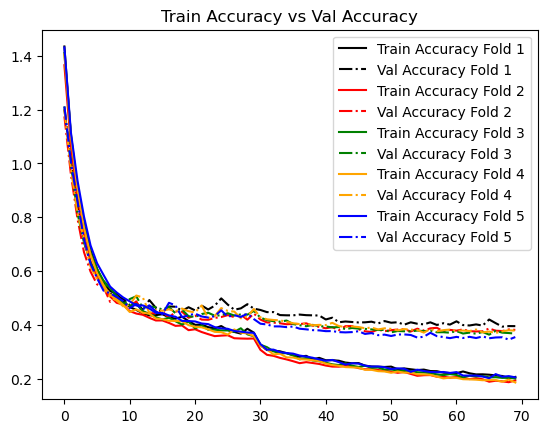

Result on val_Fold:  1
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8918 - loss: 0.3667
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9205 - loss: 0.3419
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9214 - loss: 0.3217
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9063 - loss: 0.3414
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9039 - loss: 0.3715
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
################################## Trianing Performance of Chr# and Neg# 16 2
Average Accuracy: 0.9043 ± 0.0096
Average Sensitivity: 0.9126 ± 0.0068
Average Specificity: 0.8963 ± 0.0135
Average MCC: 0.8087 ± 0.0189
Average ROC AUC: 0.9558 ± 0.0023
Average PR AUC: 0.9559 ± 0.0021
#########################

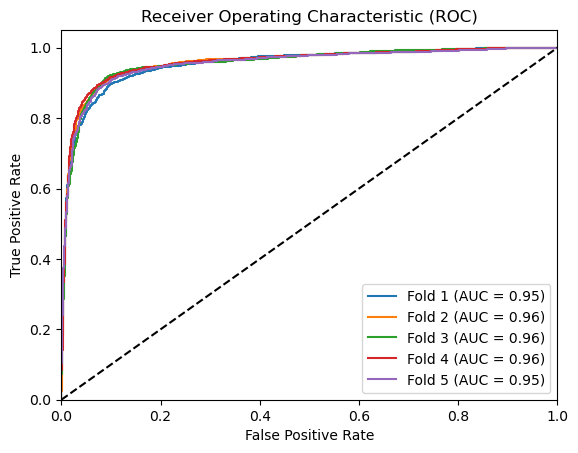

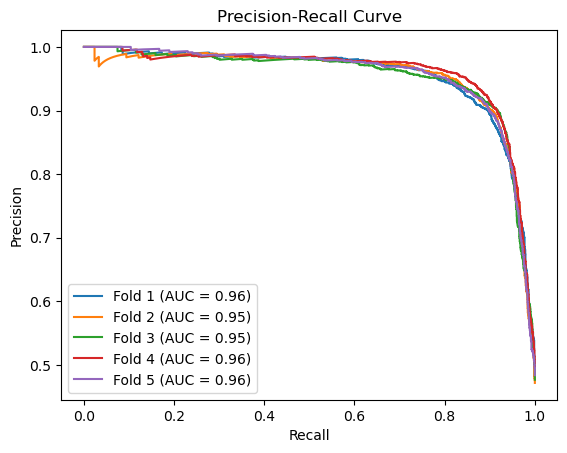

3266 2001 4
Result on val_Fold:  1
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  5
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
################################## Testing Performance of Chr# and Neg# 16 2
Average Accuracy: 0.8244 ± 0.0044
Average Sensitivity: 0.5818 ± 0.0392
Average Specificity: 0.8772 ± 0.0115
Average MCC: 0.4360 ± 0.0212
Average AUC-ROC: 0.8137 ± 0.0070
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Negative #  3
##########################################################
20293 2001 4
(20293, 2001, 4) (20293, 1, 1024) (20293,)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(16234, 2001, 4) (4059, 2001, 4)
(16234, 2001, 4) (4059, 2001, 4)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_20    │ (None, 133, 64)   │          0 │ conv1d_20[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 133, 64)   │          0 │ max_pooling1d_20… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_30[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_21    │ (None, 8, 128)    │          0 │ conv1d_21[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_21      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 8, 128)    │          0 │ max_pooling1d_21… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_20          │ (None, 1024)      │          0 │ dropout_31[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_21          │ (None, 64)        │          0 │ dense_20[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 1088)      │          0 │ flatten_20[0][0], │
│ (Concatenate)       │                   │            │ flatten_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 1088)      │          0 │ concatenate_10[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │      1,089 │ dropout_32[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5311 - loss: 1.6460
Epoch 1: val_loss improved from inf to 1.20427, saving model to Chr16/sec_folds_3/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5312 - loss: 1.6447 - val_accuracy: 0.6230 - val_loss: 1.2043 - learning_rate: 0.0010
0.001
Epoch 2/70
195/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6030 - loss: 1.1595
Epoch 2: val_loss improved from 1.20427 to 0.98850, saving model to Chr16/sec_folds_3/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6035 - loss: 1.1571 - val_accuracy: 0.6772 - val_loss: 0.9885 - learning_rate: 0.0010
0.001
Epoch 3/70
194/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6646 - loss: 0.9426
Epoch 3: val_loss improved from 0.98850 to 0.80056, saving model to Chr16/sec_folds_3/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6650 - loss: 0.9408 - val_accuracy: 0.7296 - val_loss: 0.8006 - learning_rate: 0.0010
0.0

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_22    │ (None, 133, 64)   │          0 │ conv1d_22[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 133, 64)   │          0 │ max_pooling1d_22… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_33[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_23    │ (None, 8, 128)    │          0 │ conv1d_23[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_23      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 8, 128)    │          0 │ max_pooling1d_23… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_22          │ (None, 1024)      │          0 │ dropout_34[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_23          │ (None, 64)        │          0 │ dense_22[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 1088)      │          0 │ flatten_22[0][0], │
│ (Concatenate)       │                   │            │ flatten_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 1088)      │          0 │ concatenate_11[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │      1,089 │ dropout_35[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5287 - loss: 1.7773
Epoch 1: val_loss improved from inf to 1.20822, saving model to Chr16/sec_folds_3/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5288 - loss: 1.7756 - val_accuracy: 0.6015 - val_loss: 1.2082 - learning_rate: 0.0010
0.001
Epoch 2/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5903 - loss: 1.1626
Epoch 2: val_loss improved from 1.20822 to 0.98638, saving model to Chr16/sec_folds_3/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5910 - loss: 1.1610 - val_accuracy: 0.6945 - val_loss: 0.9864 - learning_rate: 0.0010
0.001
Epoch 3/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6690 - loss: 0.9513
Epoch 3: val_loss improved from 0.98638 to 0.81929, saving model to Chr16/sec_folds_3/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6691 - loss: 0.9511 - val_accuracy: 0.7308 - val_loss: 0.8193 - learning_rate: 0.0010
0.0

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_24    │ (None, 133, 64)   │          0 │ conv1d_24[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 133, 64)   │          0 │ max_pooling1d_24… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_36[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_25    │ (None, 8, 128)    │          0 │ conv1d_25[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 8, 128)    │          0 │ max_pooling1d_25… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_25[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_24          │ (None, 1024)      │          0 │ dropout_37[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_25          │ (None, 64)        │          0 │ dense_24[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 1088)      │          0 │ flatten_24[0][0], │
│ (Concatenate)       │                   │            │ flatten_25[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 1088)      │          0 │ concatenate_12[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 1)         │      1,089 │ dropout_38[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5309 - loss: 1.6057
Epoch 1: val_loss improved from inf to 1.17364, saving model to Chr16/sec_folds_3/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5310 - loss: 1.6045 - val_accuracy: 0.5519 - val_loss: 1.1736 - learning_rate: 0.0010
0.001
Epoch 2/70
199/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6067 - loss: 1.1101
Epoch 2: val_loss improved from 1.17364 to 0.92000, saving model to Chr16/sec_folds_3/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6069 - loss: 1.1087 - val_accuracy: 0.6840 - val_loss: 0.9200 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6551 - loss: 0.8850
Epoch 3: val_loss improved from 0.92000 to 0.73694, saving model to Chr16/sec_folds_3/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6555 - loss: 0.8838 - val_accuracy: 0.7379 - val_loss: 0.7369 - learning_rate: 0.0010
0.0

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_26    │ (None, 133, 64)   │          0 │ conv1d_26[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 133, 64)   │          0 │ max_pooling1d_26… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_39[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_27    │ (None, 8, 128)    │          0 │ conv1d_27[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_27      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_40          │ (None, 8, 128)    │          0 │ max_pooling1d_27… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 1024)      │          0 │ dropout_40[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_27          │ (None, 64)        │          0 │ dense_26[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 1088)      │          0 │ flatten_26[0][0], │
│ (Concatenate)       │                   │            │ flatten_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 1088)      │          0 │ concatenate_13[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │      1,089 │ dropout_41[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5195 - loss: 1.8053
Epoch 1: val_loss improved from inf to 1.22018, saving model to Chr16/sec_folds_3/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5196 - loss: 1.8035 - val_accuracy: 0.6104 - val_loss: 1.2202 - learning_rate: 0.0010
0.001
Epoch 2/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5918 - loss: 1.1809
Epoch 2: val_loss improved from 1.22018 to 1.02829, saving model to Chr16/sec_folds_3/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5922 - loss: 1.1795 - val_accuracy: 0.6369 - val_loss: 1.0283 - learning_rate: 0.0010
0.001
Epoch 3/70
200/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6570 - loss: 0.9770
Epoch 3: val_loss improved from 1.02829 to 0.84499, saving model to Chr16/sec_folds_3/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6572 - loss: 0.9762 - val_accuracy: 0.7176 - val_loss: 0.8450 - learning_rate: 0.0010
0.0

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_28 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_28    │ (None, 133, 64)   │          0 │ conv1d_28[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 133, 64)   │          0 │ max_pooling1d_28… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_29 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_42[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_29    │ (None, 8, 128)    │          0 │ conv1d_29[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_29      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 8, 128)    │          0 │ max_pooling1d_29… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_29[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_28          │ (None, 1024)      │          0 │ dropout_43[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_29          │ (None, 64)        │          0 │ dense_28[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 1088)      │          0 │ flatten_28[0][0], │
│ (Concatenate)       │                   │            │ flatten_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 1088)      │          0 │ concatenate_14[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │      1,089 │ dropout_44[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5210 - loss: 1.7358
Epoch 1: val_loss improved from inf to 1.20189, saving model to Chr16/sec_folds_3/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5211 - loss: 1.7343 - val_accuracy: 0.6144 - val_loss: 1.2019 - learning_rate: 0.0010
0.001
Epoch 2/70
200/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5990 - loss: 1.1522
Epoch 2: val_loss improved from 1.20189 to 0.98646, saving model to Chr16/sec_folds_3/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5994 - loss: 1.1511 - val_accuracy: 0.6631 - val_loss: 0.9865 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6595 - loss: 0.9491
Epoch 3: val_loss improved from 0.98646 to 0.81122, saving model to Chr16/sec_folds_3/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6599 - loss: 0.9478 - val_accuracy: 0.7416 - val_loss: 0.8112 - learning_rate: 0.0010
0.0

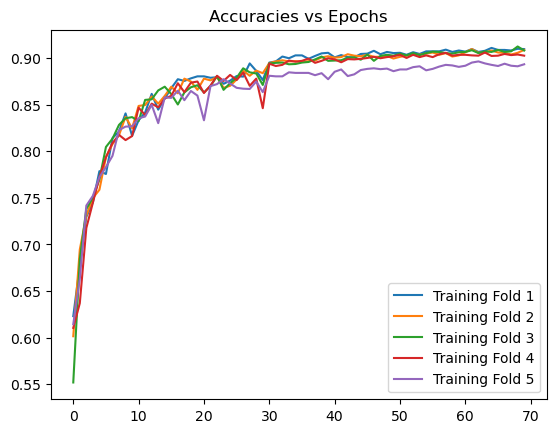

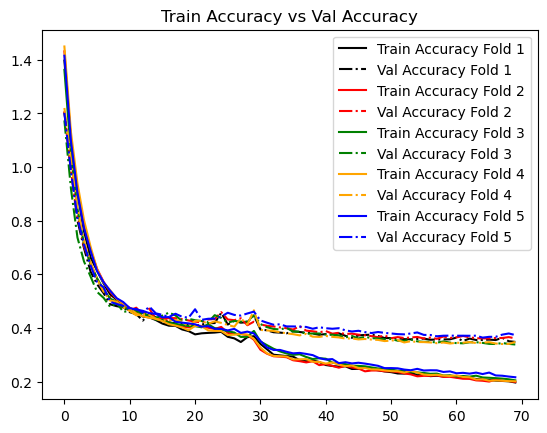

Result on val_Fold:  1
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8899 - loss: 0.4194
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9115 - loss: 0.3535
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8900 - loss: 0.4154
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8957 - loss: 0.3665
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9020 - loss: 0.3635
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Trianing Performance of Chr# and Neg# 16 3
Average Accuracy: 0.9006 ± 0.0083
Average Sensitivity: 0.9159 ± 0.0120
Average Specificity: 0.8862 ± 0.0157
Average MCC: 0.8017 ± 0.0159
Average ROC AUC: 0.9533 ± 0.0066
Average PR AUC: 0.9518 ± 0.0064
#########################

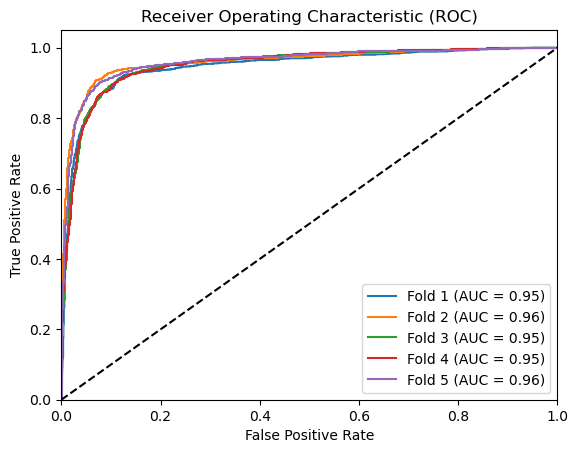

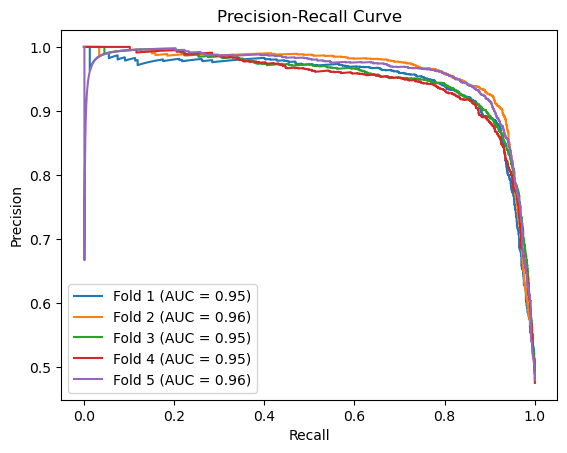

3266 2001 4
Result on val_Fold:  1
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 16 3
Average Accuracy: 0.8233 ± 0.0046
Average Sensitivity: 0.5760 ± 0.0301
Average Specificity: 0.8771 ± 0.0072
Average MCC: 0.4309 ± 0.0178
Average AUC-ROC: 0.8013 ± 0.0136
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Negative #  4
##########################################################
20293 2001 4
(20293, 2001, 4) (20293, 1, 1024) (20293,)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(16234, 2001, 4) (4059, 2001, 4)
(16234, 2001, 4) (4059, 2001, 4)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_30 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_30[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_30    │ (None, 133, 64)   │          0 │ conv1d_30[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 133, 64)   │          0 │ max_pooling1d_30… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_31 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_45[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_31    │ (None, 8, 128)    │          0 │ conv1d_31[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_31      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 8, 128)    │          0 │ max_pooling1d_31… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_31[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_30          │ (None, 1024)      │          0 │ dropout_46[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_31          │ (None, 64)        │          0 │ dense_30[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 1088)      │          0 │ flatten_30[0][0], │
│ (Concatenate)       │                   │            │ flatten_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 1088)      │          0 │ concatenate_15[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 1)         │      1,089 │ dropout_47[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5185 - loss: 1.8624
Epoch 1: val_loss improved from inf to 1.23235, saving model to Chr16/sec_folds_4/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5186 - loss: 1.8605 - val_accuracy: 0.6104 - val_loss: 1.2324 - learning_rate: 0.0010
0.001
Epoch 2/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5989 - loss: 1.1829
Epoch 2: val_loss improved from 1.23235 to 1.02512, saving model to Chr16/sec_folds_4/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5990 - loss: 1.1827 - val_accuracy: 0.6785 - val_loss: 1.0251 - learning_rate: 0.0010
0.001
Epoch 3/70
194/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6694 - loss: 0.9884
Epoch 3: val_loss improved from 1.02512 to 0.84636, saving model to Chr16/sec_folds_4/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6700 - loss: 0.9863 - val_accuracy: 0.7358 - val_loss: 0.8464 - learning_rate: 0.0010
0.0

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_32 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_32    │ (None, 133, 64)   │          0 │ conv1d_32[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 133, 64)   │          0 │ max_pooling1d_32… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_33    │ (None, 8, 128)    │          0 │ conv1d_33[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_33      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 8, 128)    │          0 │ max_pooling1d_33… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_33[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_32          │ (None, 1024)      │          0 │ dropout_49[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_33          │ (None, 64)        │          0 │ dense_32[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 1088)      │          0 │ flatten_32[0][0], │
│ (Concatenate)       │                   │            │ flatten_33[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 1088)      │          0 │ concatenate_16[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1)         │      1,089 │ dropout_50[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5389 - loss: 1.6427
Epoch 1: val_loss improved from inf to 1.19087, saving model to Chr16/sec_folds_4/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5390 - loss: 1.6414 - val_accuracy: 0.6064 - val_loss: 1.1909 - learning_rate: 0.0010
0.001
Epoch 2/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5879 - loss: 1.1425
Epoch 2: val_loss improved from 1.19087 to 0.96623, saving model to Chr16/sec_folds_4/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5880 - loss: 1.1423 - val_accuracy: 0.6816 - val_loss: 0.9662 - learning_rate: 0.0010
0.001
Epoch 3/70
192/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6660 - loss: 0.9231
Epoch 3: val_loss improved from 0.96623 to 0.79807, saving model to Chr16/sec_folds_4/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6664 - loss: 0.9208 - val_accuracy: 0.7250 - val_loss: 0.7981 - learning_rate: 0.0010
0.0

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_34[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_34    │ (None, 133, 64)   │          0 │ conv1d_34[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 133, 64)   │          0 │ max_pooling1d_34… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_51[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_35    │ (None, 8, 128)    │          0 │ conv1d_35[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_35      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_52          │ (None, 8, 128)    │          0 │ max_pooling1d_35… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_35[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_34          │ (None, 1024)      │          0 │ dropout_52[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_35          │ (None, 64)        │          0 │ dense_34[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 1088)      │          0 │ flatten_34[0][0], │
│ (Concatenate)       │                   │            │ flatten_35[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_53          │ (None, 1088)      │          0 │ concatenate_17[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │      1,089 │ dropout_53[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5325 - loss: 1.6812
Epoch 1: val_loss improved from inf to 1.19279, saving model to Chr16/sec_folds_4/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5327 - loss: 1.6799 - val_accuracy: 0.5889 - val_loss: 1.1928 - learning_rate: 0.0010
0.001
Epoch 2/70
200/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5950 - loss: 1.1467
Epoch 2: val_loss improved from 1.19279 to 0.96731, saving model to Chr16/sec_folds_4/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5951 - loss: 1.1458 - val_accuracy: 0.6612 - val_loss: 0.9673 - learning_rate: 0.0010
0.001
Epoch 3/70
192/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6293 - loss: 0.9543
Epoch 3: val_loss improved from 0.96731 to 0.79567, saving model to Chr16/sec_folds_4/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6301 - loss: 0.9516 - val_accuracy: 0.7148 - val_loss: 0.7957 - learning_rate: 0.0010
0.0

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_36[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_36    │ (None, 133, 64)   │          0 │ conv1d_36[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_54          │ (None, 133, 64)   │          0 │ max_pooling1d_36… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_54[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_37    │ (None, 8, 128)    │          0 │ conv1d_37[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_37      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_55          │ (None, 8, 128)    │          0 │ max_pooling1d_37… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_37[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_36          │ (None, 1024)      │          0 │ dropout_55[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_37          │ (None, 64)        │          0 │ dense_36[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_18      │ (None, 1088)      │          0 │ flatten_36[0][0], │
│ (Concatenate)       │                   │            │ flatten_37[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_56          │ (None, 1088)      │          0 │ concatenate_18[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 1)         │      1,089 │ dropout_56[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5268 - loss: 1.6763
Epoch 1: val_loss improved from inf to 1.16714, saving model to Chr16/sec_folds_4/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5269 - loss: 1.6749 - val_accuracy: 0.6206 - val_loss: 1.1671 - learning_rate: 0.0010
0.001
Epoch 2/70
201/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6027 - loss: 1.1270
Epoch 2: val_loss improved from 1.16714 to 0.94707, saving model to Chr16/sec_folds_4/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6030 - loss: 1.1261 - val_accuracy: 0.7197 - val_loss: 0.9471 - learning_rate: 0.0010
0.001
Epoch 3/70
196/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6675 - loss: 0.9099
Epoch 3: val_loss improved from 0.94707 to 0.77611, saving model to Chr16/sec_folds_4/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6679 - loss: 0.9083 - val_accuracy: 0.7305 - val_loss: 0.7761 - learning_rate: 0.0010
0.0

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_38      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_38[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_38    │ (None, 133, 64)   │          0 │ conv1d_38[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_57          │ (None, 133, 64)   │          0 │ max_pooling1d_38… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_57[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_39    │ (None, 8, 128)    │          0 │ conv1d_39[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_39      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_58          │ (None, 8, 128)    │          0 │ max_pooling1d_39… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_39[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_38          │ (None, 1024)      │          0 │ dropout_58[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_39          │ (None, 64)        │          0 │ dense_38[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_19      │ (None, 1088)      │          0 │ flatten_38[0][0], │
│ (Concatenate)       │                   │            │ flatten_39[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_59          │ (None, 1088)      │          0 │ concatenate_19[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 1)         │      1,089 │ dropout_59[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5387 - loss: 1.6926
Epoch 1: val_loss improved from inf to 1.19269, saving model to Chr16/sec_folds_4/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5388 - loss: 1.6912 - val_accuracy: 0.6196 - val_loss: 1.1927 - learning_rate: 0.0010
0.001
Epoch 2/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 1.1441
Epoch 2: val_loss improved from 1.19269 to 0.97345, saving model to Chr16/sec_folds_4/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5987 - loss: 1.1424 - val_accuracy: 0.6732 - val_loss: 0.9735 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6601 - loss: 0.9310
Epoch 3: val_loss improved from 0.97345 to 0.80991, saving model to Chr16/sec_folds_4/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6606 - loss: 0.9297 - val_accuracy: 0.6985 - val_loss: 0.8099 - learning_rate: 0.0010
0.0

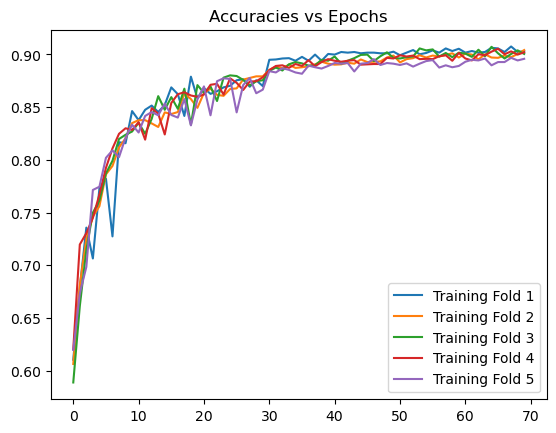

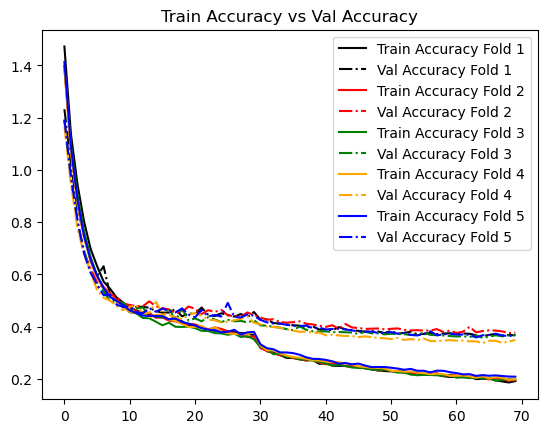

Result on val_Fold:  1
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.3296
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9119 - loss: 0.3634
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9070 - loss: 0.3385
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8981 - loss: 0.3774
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8886 - loss: 0.3900
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
################################## Trianing Performance of Chr# and Neg# 16 4
Average Accuracy: 0.9017 ± 0.0067
Average Sensitivity: 0.9107 ± 0.0160
Average Specificity: 0.8933 ± 0.0148
Average MCC: 0.8038 ± 0.0131
Average ROC AUC: 0.9548 ± 0.0032
Average PR AUC: 0.9544 ± 0.0032
#########################

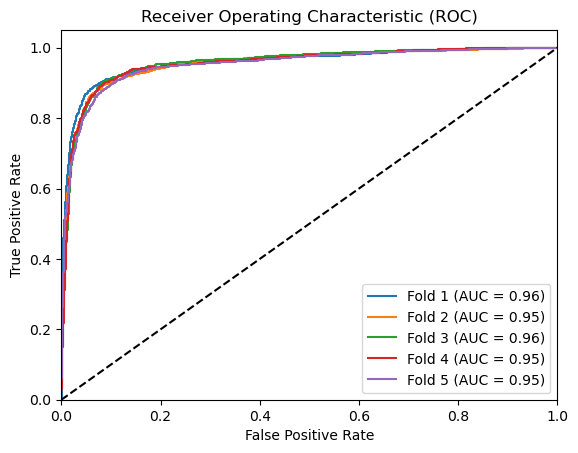

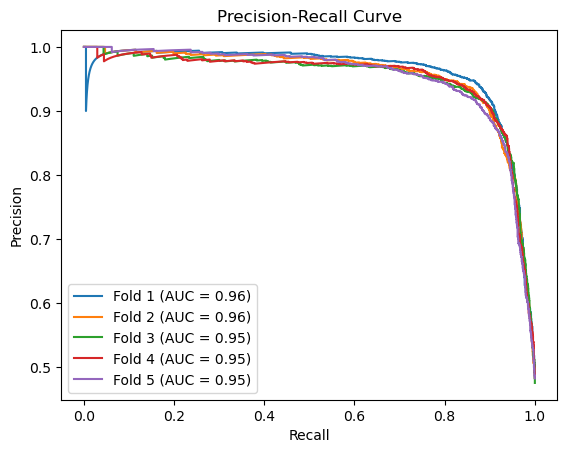

3266 2001 4
Result on val_Fold:  1
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 16 4
Average Accuracy: 0.8181 ± 0.0078
Average Sensitivity: 0.5325 ± 0.0358
Average Specificity: 0.8803 ± 0.0120
Average MCC: 0.4006 ± 0.0125
Average AUC-ROC: 0.7922 ± 0.0139
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Negative #  5
##########################################################
20293 2001 4
(20293, 2001, 4) (20293, 1, 1024) (20293,)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(20293, 2001, 4) (20293, 1, 1024) (20293, 1)
(16234, 2001, 4) (4059, 2001, 4)
(16234, 2001, 4) (4059, 2001, 4)

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_40      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_40[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_40    │ (None, 133, 64)   │          0 │ conv1d_40[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_60          │ (None, 133, 64)   │          0 │ max_pooling1d_40… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_60[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_41    │ (None, 8, 128)    │          0 │ conv1d_41[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_41      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_61          │ (None, 8, 128)    │          0 │ max_pooling1d_41… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_41[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_40          │ (None, 1024)      │          0 │ dropout_61[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_41          │ (None, 64)        │          0 │ dense_40[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 1088)      │          0 │ flatten_40[0][0], │
│ (Concatenate)       │                   │            │ flatten_41[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_62          │ (None, 1088)      │          0 │ concatenate_20[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 1)         │      1,089 │ dropout_62[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5283 - loss: 1.8220
Epoch 1: val_loss improved from inf to 1.22369, saving model to Chr16/sec_folds_5/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5284 - loss: 1.8202 - val_accuracy: 0.6116 - val_loss: 1.2237 - learning_rate: 0.0010
0.001
Epoch 2/70
196/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5938 - loss: 1.1813
Epoch 2: val_loss improved from 1.22369 to 1.04012, saving model to Chr16/sec_folds_5/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5941 - loss: 1.1795 - val_accuracy: 0.6160 - val_loss: 1.0401 - learning_rate: 0.0010
0.001
Epoch 3/70
192/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.9829
Epoch 3: val_loss improved from 1.04012 to 0.83838, saving model to Chr16/sec_folds_5/best_0_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6568 - loss: 0.9807 - val_accuracy: 0.7179 - val_loss: 0.8384 - learning_rate: 0.0010
0.0

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_42 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_42[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_42    │ (None, 133, 64)   │          0 │ conv1d_42[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_63          │ (None, 133, 64)   │          0 │ max_pooling1d_42… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_43 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_63[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_43    │ (None, 8, 128)    │          0 │ conv1d_43[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_43      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_64          │ (None, 8, 128)    │          0 │ max_pooling1d_43… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_43[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_42          │ (None, 1024)      │          0 │ dropout_64[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_43          │ (None, 64)        │          0 │ dense_42[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 1088)      │          0 │ flatten_42[0][0], │
│ (Concatenate)       │                   │            │ flatten_43[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_65          │ (None, 1088)      │          0 │ concatenate_21[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │      1,089 │ dropout_65[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5341 - loss: 1.6820
Epoch 1: val_loss improved from inf to 1.21073, saving model to Chr16/sec_folds_5/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5342 - loss: 1.6806 - val_accuracy: 0.5975 - val_loss: 1.2107 - learning_rate: 0.0010
0.001
Epoch 2/70
194/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5923 - loss: 1.1735
Epoch 2: val_loss improved from 1.21073 to 1.01191, saving model to Chr16/sec_folds_5/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5926 - loss: 1.1711 - val_accuracy: 0.6412 - val_loss: 1.0119 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6317 - loss: 0.9816
Epoch 3: val_loss improved from 1.01191 to 0.85987, saving model to Chr16/sec_folds_5/best_1_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6318 - loss: 0.9804 - val_accuracy: 0.6862 - val_loss: 0.8599 - learning_rate: 0.0010
0.0

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_44      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_44 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_44[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_44    │ (None, 133, 64)   │          0 │ conv1d_44[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_66          │ (None, 133, 64)   │          0 │ max_pooling1d_44… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_45 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_66[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_45    │ (None, 8, 128)    │          0 │ conv1d_45[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_45      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 8, 128)    │          0 │ max_pooling1d_45… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_45[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_44          │ (None, 1024)      │          0 │ dropout_67[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_45          │ (None, 64)        │          0 │ dense_44[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 1088)      │          0 │ flatten_44[0][0], │
│ (Concatenate)       │                   │            │ flatten_45[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_68          │ (None, 1088)      │          0 │ concatenate_22[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 1)         │      1,089 │ dropout_68[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5288 - loss: 1.7570
Epoch 1: val_loss improved from inf to 1.21654, saving model to Chr16/sec_folds_5/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5289 - loss: 1.7554 - val_accuracy: 0.6079 - val_loss: 1.2165 - learning_rate: 0.0010
0.001
Epoch 2/70
199/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6225 - loss: 1.1538
Epoch 2: val_loss improved from 1.21654 to 0.99627, saving model to Chr16/sec_folds_5/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6228 - loss: 1.1525 - val_accuracy: 0.6794 - val_loss: 0.9963 - learning_rate: 0.0010
0.001
Epoch 3/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6671 - loss: 0.9542
Epoch 3: val_loss improved from 0.99627 to 0.83841, saving model to Chr16/sec_folds_5/best_2_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6672 - loss: 0.9532 - val_accuracy: 0.7219 - val_loss: 0.8384 - learning_rate: 0.0010
0.0

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_46      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_46 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_46[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_46    │ (None, 133, 64)   │          0 │ conv1d_46[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_69          │ (None, 133, 64)   │          0 │ max_pooling1d_46… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_47 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_69[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_47    │ (None, 8, 128)    │          0 │ conv1d_47[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_47      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_70          │ (None, 8, 128)    │          0 │ max_pooling1d_47… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_47[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_46          │ (None, 1024)      │          0 │ dropout_70[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_47          │ (None, 64)        │          0 │ dense_46[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 1088)      │          0 │ flatten_46[0][0], │
│ (Concatenate)       │                   │            │ flatten_47[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_71          │ (None, 1088)      │          0 │ concatenate_23[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 1)         │      1,089 │ dropout_71[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5445 - loss: 1.6211
Epoch 1: val_loss improved from inf to 1.16364, saving model to Chr16/sec_folds_5/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5446 - loss: 1.6199 - val_accuracy: 0.6535 - val_loss: 1.1636 - learning_rate: 0.0010
0.001
Epoch 2/70
198/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6053 - loss: 1.1195
Epoch 2: val_loss improved from 1.16364 to 0.93178, saving model to Chr16/sec_folds_5/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6056 - loss: 1.1179 - val_accuracy: 0.6948 - val_loss: 0.9318 - learning_rate: 0.0010
0.001
Epoch 3/70
201/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 0.9076
Epoch 3: val_loss improved from 0.93178 to 0.77299, saving model to Chr16/sec_folds_5/best_3_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6658 - loss: 0.9069 - val_accuracy: 0.7287 - val_loss: 0.7730 - learning_rate: 0.0010
0.0

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_48      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_48 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_48[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_48    │ (None, 133, 64)   │          0 │ conv1d_48[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_72          │ (None, 133, 64)   │          0 │ max_pooling1d_48… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_49 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_72[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_49    │ (None, 8, 128)    │          0 │ conv1d_49[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_49      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 8, 128)    │          0 │ max_pooling1d_49… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_49[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_48          │ (None, 1024)      │          0 │ dropout_73[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_49          │ (None, 64)        │          0 │ dense_48[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 1088)      │          0 │ flatten_48[0][0], │
│ (Concatenate)       │                   │            │ flatten_49[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_74          │ (None, 1088)      │          0 │ concatenate_24[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 1)         │      1,089 │ dropout_74[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5259 - loss: 1.7822
Epoch 1: val_loss improved from inf to 1.19851, saving model to Chr16/sec_folds_5/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5260 - loss: 1.7804 - val_accuracy: 0.6144 - val_loss: 1.1985 - learning_rate: 0.0010
0.001
Epoch 2/70
199/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6057 - loss: 1.1549
Epoch 2: val_loss improved from 1.19851 to 0.97890, saving model to Chr16/sec_folds_5/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6061 - loss: 1.1536 - val_accuracy: 0.7028 - val_loss: 0.9789 - learning_rate: 0.0010
0.001
Epoch 3/70
196/203 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - loss: 0.9525
Epoch 3: val_loss improved from 0.97890 to 0.82122, saving model to Chr16/sec_folds_5/best_4_.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6701 - loss: 0.9507 - val_accuracy: 0.7296 - val_loss: 0.8212 - learning_rate: 0.0010
0.0

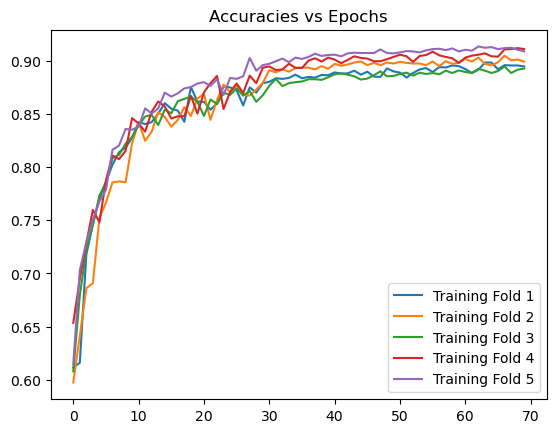

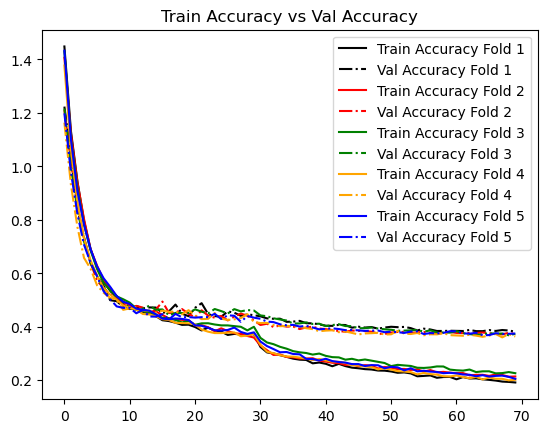

Result on val_Fold:  1
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8913 - loss: 0.3883
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  2
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8996 - loss: 0.3334
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8900 - loss: 0.3935
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9126 - loss: 0.3621
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 0.3521
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Trianing Performance of Chr# and Neg# 16 5
Average Accuracy: 0.9011 ± 0.0128
Average Sensitivity: 0.9151 ± 0.0088
Average Specificity: 0.8880 ± 0.0179
Average MCC: 0.8029 ± 0.0254
Average ROC AUC: 0.9552 ± 0.0075
Average PR AUC: 0.9550 ± 0.0055
#########################

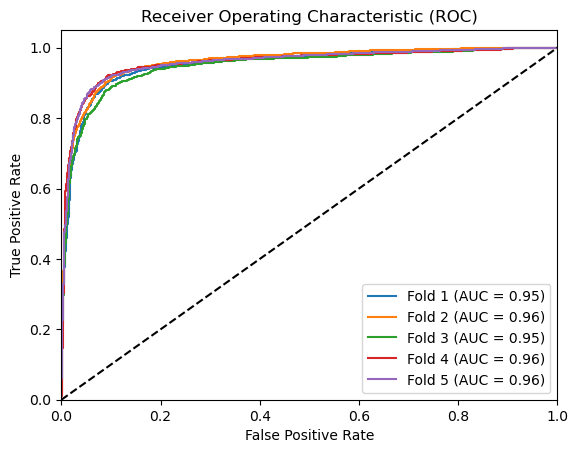

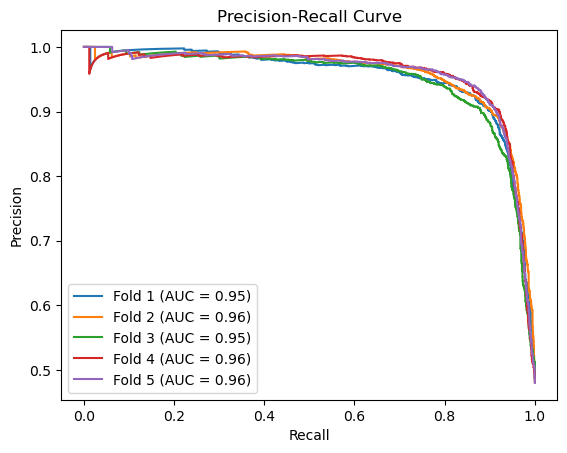

3266 2001 4
Result on val_Fold:  1
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  2
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 16 5
Average Accuracy: 0.8216 ± 0.0120
Average Sensitivity: 0.5435 ± 0.0327
Average Specificity: 0.8821 ± 0.0202
Average MCC: 0.4134 ± 0.0286
Average AUC-ROC: 0.7921 ± 0.0037
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Chromosome #  17
##########################################################
Negative #  1
##########################################################
19983 2001 4
(19983, 2001, 4) (19983, 1, 1024) (19983,)
(19983, 2001, 4) (19983, 1, 1024) (19983, 1)
(19983, 2001, 4) (19983, 1, 1024) 

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_50      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_50 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_50[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_50    │ (None, 133, 64)   │          0 │ conv1d_50[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_75          │ (None, 133, 64)   │          0 │ max_pooling1d_50… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_51 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_75[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_51    │ (None, 8, 128)    │          0 │ conv1d_51[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_51      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_76          │ (None, 8, 128)    │          0 │ max_pooling1d_51… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_51[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_50          │ (None, 1024)      │          0 │ dropout_76[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_51          │ (None, 64)        │          0 │ dense_50[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 1088)      │          0 │ flatten_50[0][0], │
│ (Concatenate)       │                   │            │ flatten_51[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_77          │ (None, 1088)      │          0 │ concatenate_25[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 1)         │      1,089 │ dropout_77[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5444 - loss: 1.5883
Epoch 1: val_loss improved from inf to 1.16537, saving model to Chr17/sec_folds_1/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5445 - loss: 1.5872 - val_accuracy: 0.5991 - val_loss: 1.1654 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6094 - loss: 1.1085
Epoch 2: val_loss improved from 1.16537 to 0.93630, saving model to Chr17/sec_folds_1/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6096 - loss: 1.1074 - val_accuracy: 0.7101 - val_loss: 0.9363 - learning_rate: 0.0010
0.001
Epoch 3/70
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 0.8977
Epoch 3: val_loss improved from 0.93630 to 0.75498, saving model to Chr17/sec_folds_1/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6664 - loss: 0.8953 - val_accuracy: 0.7442 - val_loss: 0.7550 - learning_rate: 0.0010
0.0

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_52      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_52 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_52[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_52    │ (None, 133, 64)   │          0 │ conv1d_52[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_78          │ (None, 133, 64)   │          0 │ max_pooling1d_52… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_53 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_78[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_53    │ (None, 8, 128)    │          0 │ conv1d_53[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_53      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_79          │ (None, 8, 128)    │          0 │ max_pooling1d_53… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_53[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_52          │ (None, 1024)      │          0 │ dropout_79[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_53          │ (None, 64)        │          0 │ dense_52[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_26      │ (None, 1088)      │          0 │ flatten_52[0][0], │
│ (Concatenate)       │                   │            │ flatten_53[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_80          │ (None, 1088)      │          0 │ concatenate_26[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 1)         │      1,089 │ dropout_80[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5232 - loss: 1.8034
Epoch 1: val_loss improved from inf to 1.20635, saving model to Chr17/sec_folds_1/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5233 - loss: 1.8016 - val_accuracy: 0.5935 - val_loss: 1.2064 - learning_rate: 0.0010
0.001
Epoch 2/70
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6083 - loss: 1.1578
Epoch 2: val_loss improved from 1.20635 to 0.98574, saving model to Chr17/sec_folds_1/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6086 - loss: 1.1551 - val_accuracy: 0.6851 - val_loss: 0.9857 - learning_rate: 0.0010
0.001
Epoch 3/70
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 0.9551
Epoch 3: val_loss improved from 0.98574 to 0.81783, saving model to Chr17/sec_folds_1/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6660 - loss: 0.9528 - val_accuracy: 0.7395 - val_loss: 0.8178 - learning_rate: 0.0010
0.0

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_54      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_54 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_54[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_54    │ (None, 133, 64)   │          0 │ conv1d_54[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_81          │ (None, 133, 64)   │          0 │ max_pooling1d_54… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_55 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_81[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_55    │ (None, 8, 128)    │          0 │ conv1d_55[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_55      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_82          │ (None, 8, 128)    │          0 │ max_pooling1d_55… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_55[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_54          │ (None, 1024)      │          0 │ dropout_82[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_55          │ (None, 64)        │          0 │ dense_54[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 1088)      │          0 │ flatten_54[0][0], │
│ (Concatenate)       │                   │            │ flatten_55[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_83          │ (None, 1088)      │          0 │ concatenate_27[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 1)         │      1,089 │ dropout_83[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5307 - loss: 1.7109
Epoch 1: val_loss improved from inf to 1.21767, saving model to Chr17/sec_folds_1/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5309 - loss: 1.7095 - val_accuracy: 0.5869 - val_loss: 1.2177 - learning_rate: 0.0010
0.001
Epoch 2/70
189/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 1.1720
Epoch 2: val_loss improved from 1.21767 to 1.00839, saving model to Chr17/sec_folds_1/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5919 - loss: 1.1692 - val_accuracy: 0.6648 - val_loss: 1.0084 - learning_rate: 0.0010
0.001
Epoch 3/70
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.9701
Epoch 3: val_loss improved from 1.00839 to 0.83559, saving model to Chr17/sec_folds_1/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6533 - loss: 0.9682 - val_accuracy: 0.7064 - val_loss: 0.8356 - learning_rate: 0.0010
0.0

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_56      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_56 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_56[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_56    │ (None, 133, 64)   │          0 │ conv1d_56[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_84          │ (None, 133, 64)   │          0 │ max_pooling1d_56… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_57 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_84[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_57    │ (None, 8, 128)    │          0 │ conv1d_57[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_57      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_85          │ (None, 8, 128)    │          0 │ max_pooling1d_57… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_57[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_56          │ (None, 1024)      │          0 │ dropout_85[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_57          │ (None, 64)        │          0 │ dense_56[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 1088)      │          0 │ flatten_56[0][0], │
│ (Concatenate)       │                   │            │ flatten_57[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_86          │ (None, 1088)      │          0 │ concatenate_28[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 1)         │      1,089 │ dropout_86[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5215 - loss: 1.7555
Epoch 1: val_loss improved from inf to 1.22055, saving model to Chr17/sec_folds_1/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5216 - loss: 1.7539 - val_accuracy: 0.5485 - val_loss: 1.2206 - learning_rate: 0.0010
0.001
Epoch 2/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5978 - loss: 1.1674
Epoch 2: val_loss improved from 1.22055 to 1.01101, saving model to Chr17/sec_folds_1/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5980 - loss: 1.1660 - val_accuracy: 0.6520 - val_loss: 1.0110 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6451 - loss: 0.9675
Epoch 3: val_loss improved from 1.01101 to 0.82092, saving model to Chr17/sec_folds_1/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6453 - loss: 0.9669 - val_accuracy: 0.7464 - val_loss: 0.8209 - learning_rate: 0.0010
0.0

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_58      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_58 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_58[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_58    │ (None, 133, 64)   │          0 │ conv1d_58[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_87          │ (None, 133, 64)   │          0 │ max_pooling1d_58… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_59 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_87[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_59    │ (None, 8, 128)    │          0 │ conv1d_59[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_59      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_88          │ (None, 8, 128)    │          0 │ max_pooling1d_59… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_59[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_58          │ (None, 1024)      │          0 │ dropout_88[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_59          │ (None, 64)        │          0 │ dense_58[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_29      │ (None, 1088)      │          0 │ flatten_58[0][0], │
│ (Concatenate)       │                   │            │ flatten_59[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_89          │ (None, 1088)      │          0 │ concatenate_29[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 1)         │      1,089 │ dropout_89[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5408 - loss: 1.5934
Epoch 1: val_loss improved from inf to 1.16384, saving model to Chr17/sec_folds_1/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5409 - loss: 1.5923 - val_accuracy: 0.6066 - val_loss: 1.1638 - learning_rate: 0.0010
0.001
Epoch 2/70
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6150 - loss: 1.1129
Epoch 2: val_loss improved from 1.16384 to 0.94273, saving model to Chr17/sec_folds_1/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6154 - loss: 1.1107 - val_accuracy: 0.6670 - val_loss: 0.9427 - learning_rate: 0.0010
0.001
Epoch 3/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6543 - loss: 0.9087
Epoch 3: val_loss improved from 0.94273 to 0.78824, saving model to Chr17/sec_folds_1/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6548 - loss: 0.9075 - val_accuracy: 0.6976 - val_loss: 0.7882 - learning_rate: 0.0010
0.0

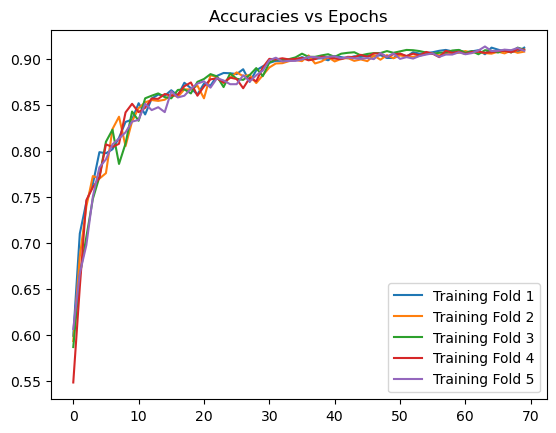

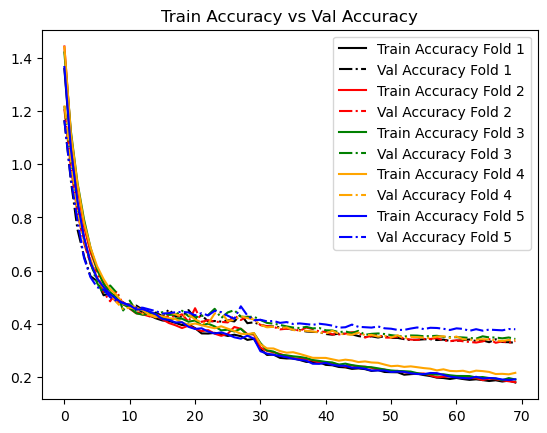

Result on val_Fold:  1
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9040 - loss: 0.3375
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Result on val_Fold:  2
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8983 - loss: 0.3757
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  3
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9094 - loss: 0.3615
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9073 - loss: 0.3461
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9152 - loss: 0.3237
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
################################## Trianing Performance of Chr# and Neg# 17 1
Average Accuracy: 0.9049 ± 0.0059
Average Sensitivity: 0.9161 ± 0.0115
Average Specificity: 0.8944 ± 0.0115
Average MCC: 0.8101 ± 0.0116
Average ROC AUC: 0.9577 ± 0.0042
Average PR AUC: 0.9585 ± 0.0045
#########################

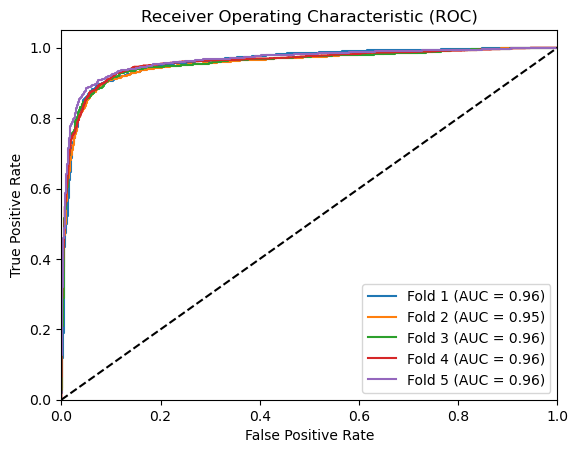

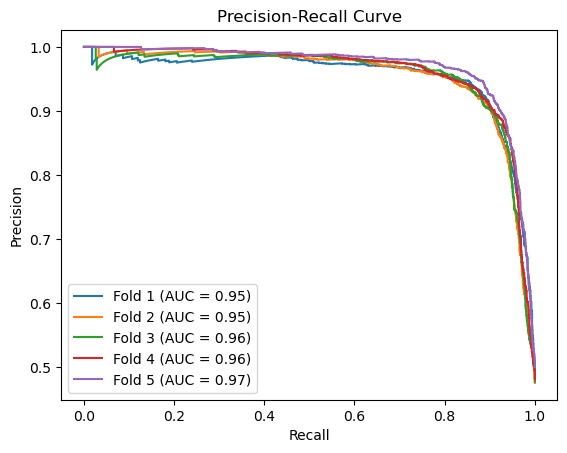

4124 2001 4
Result on val_Fold:  1
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  2
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Result on val_Fold:  4
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 17 1
Average Accuracy: 0.7959 ± 0.0054
Average Sensitivity: 0.5578 ± 0.0319
Average Specificity: 0.8495 ± 0.0134
Average MCC: 0.3776 ± 0.0243
Average AUC-ROC: 0.7690 ± 0.0182
############################################################################
Testing performance results saved to 'Testing_Result.xlsx'.
Negative #  2
##########################################################
19983 2001 4
(19983, 2001, 4) (19983, 1, 1024) (19983,)
(19983, 2001, 4) (19983, 1, 1024) (19983, 1)
(19983, 2001, 4) (19983, 1, 1024) (19983, 1)
(15986, 2001, 4) (3997, 2001, 4)
(15986, 2001, 4) (3997, 2001, 4)

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_60      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_60 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_60[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_60    │ (None, 133, 64)   │          0 │ conv1d_60[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_90          │ (None, 133, 64)   │          0 │ max_pooling1d_60… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_61 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_90[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_61    │ (None, 8, 128)    │          0 │ conv1d_61[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_61      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_91          │ (None, 8, 128)    │          0 │ max_pooling1d_61… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_61[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_60          │ (None, 1024)      │          0 │ dropout_91[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_61          │ (None, 64)        │          0 │ dense_60[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_30      │ (None, 1088)      │          0 │ flatten_60[0][0], │
│ (Concatenate)       │                   │            │ flatten_61[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_92          │ (None, 1088)      │          0 │ concatenate_30[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 1)         │      1,089 │ dropout_92[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5245 - loss: 1.7218
Epoch 1: val_loss improved from inf to 1.21697, saving model to Chr17/sec_folds_2/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5246 - loss: 1.7203 - val_accuracy: 0.5935 - val_loss: 1.2170 - learning_rate: 0.0010
0.001
Epoch 2/70
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5941 - loss: 1.1697
Epoch 2: val_loss improved from 1.21697 to 1.02320, saving model to Chr17/sec_folds_2/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5942 - loss: 1.1680 - val_accuracy: 0.6285 - val_loss: 1.0232 - learning_rate: 0.0010
0.001
Epoch 3/70
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6216 - loss: 0.9843
Epoch 3: val_loss improved from 1.02320 to 0.86271, saving model to Chr17/sec_folds_2/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6218 - loss: 0.9825 - val_accuracy: 0.6673 - val_loss: 0.8627 - learning_rate: 0.0010
0.

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_62      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_62 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_62[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_62    │ (None, 133, 64)   │          0 │ conv1d_62[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_93          │ (None, 133, 64)   │          0 │ max_pooling1d_62… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_63 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_93[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_63    │ (None, 8, 128)    │          0 │ conv1d_63[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_63      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_94          │ (None, 8, 128)    │          0 │ max_pooling1d_63… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_63[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_62          │ (None, 1024)      │          0 │ dropout_94[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_63          │ (None, 64)        │          0 │ dense_62[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_31      │ (None, 1088)      │          0 │ flatten_62[0][0], │
│ (Concatenate)       │                   │            │ flatten_63[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_95          │ (None, 1088)      │          0 │ concatenate_31[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 1)         │      1,089 │ dropout_95[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5215 - loss: 1.7214
Epoch 1: val_loss improved from inf to 1.20993, saving model to Chr17/sec_folds_2/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5217 - loss: 1.7199 - val_accuracy: 0.5829 - val_loss: 1.2099 - learning_rate: 0.0010
0.001
Epoch 2/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5893 - loss: 1.1676
Epoch 2: val_loss improved from 1.20993 to 1.01061, saving model to Chr17/sec_folds_2/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5896 - loss: 1.1667 - val_accuracy: 0.6270 - val_loss: 1.0106 - learning_rate: 0.0010
0.001
Epoch 3/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6607 - loss: 0.9521
Epoch 3: val_loss improved from 1.01061 to 0.81514, saving model to Chr17/sec_folds_2/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6610 - loss: 0.9512 - val_accuracy: 0.7317 - val_loss: 0.8151 - learning_rate: 0.0010
0.0

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_64      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_64 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_64[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_64    │ (None, 133, 64)   │          0 │ conv1d_64[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_96          │ (None, 133, 64)   │          0 │ max_pooling1d_64… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_65 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_96[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_65    │ (None, 8, 128)    │          0 │ conv1d_65[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_65      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_97          │ (None, 8, 128)    │          0 │ max_pooling1d_65… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_65[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_64          │ (None, 1024)      │          0 │ dropout_97[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_65          │ (None, 64)        │          0 │ dense_64[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_32      │ (None, 1088)      │          0 │ flatten_64[0][0], │
│ (Concatenate)       │                   │            │ flatten_65[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_98          │ (None, 1088)      │          0 │ concatenate_32[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 1)         │      1,089 │ dropout_98[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5148 - loss: 1.7064
Epoch 1: val_loss improved from inf to 1.20115, saving model to Chr17/sec_folds_2/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5150 - loss: 1.7049 - val_accuracy: 0.5894 - val_loss: 1.2012 - learning_rate: 0.0010
0.001
Epoch 2/70
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5945 - loss: 1.1480
Epoch 2: val_loss improved from 1.20115 to 0.98547, saving model to Chr17/sec_folds_2/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5947 - loss: 1.1456 - val_accuracy: 0.6376 - val_loss: 0.9855 - learning_rate: 0.0010
0.001
Epoch 3/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6409 - loss: 0.9466
Epoch 3: val_loss improved from 0.98547 to 0.81655, saving model to Chr17/sec_folds_2/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6413 - loss: 0.9455 - val_accuracy: 0.7139 - val_loss: 0.8166 - learning_rate: 0.0010
0.0

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_66      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_66 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_66[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_66    │ (None, 133, 64)   │          0 │ conv1d_66[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_99          │ (None, 133, 64)   │          0 │ max_pooling1d_66… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_67 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_99[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_67    │ (None, 8, 128)    │          0 │ conv1d_67[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_67      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_100         │ (None, 8, 128)    │          0 │ max_pooling1d_67… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_67[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_66          │ (None, 1024)      │          0 │ dropout_100[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_67          │ (None, 64)        │          0 │ dense_66[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_33      │ (None, 1088)      │          0 │ flatten_66[0][0], │
│ (Concatenate)       │                   │            │ flatten_67[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_101         │ (None, 1088)      │          0 │ concatenate_33[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 1)         │      1,089 │ dropout_101[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5243 - loss: 1.6534
Epoch 1: val_loss improved from inf to 1.19519, saving model to Chr17/sec_folds_2/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5245 - loss: 1.6521 - val_accuracy: 0.6069 - val_loss: 1.1952 - learning_rate: 0.0010
0.001
Epoch 2/70
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5863 - loss: 1.1472
Epoch 2: val_loss improved from 1.19519 to 0.98598, saving model to Chr17/sec_folds_2/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5865 - loss: 1.1467 - val_accuracy: 0.6426 - val_loss: 0.9860 - learning_rate: 0.0010
0.001
Epoch 3/70
194/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6477 - loss: 0.9408
Epoch 3: val_loss improved from 0.98598 to 0.79780, saving model to Chr17/sec_folds_2/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6480 - loss: 0.9394 - val_accuracy: 0.7245 - val_loss: 0.7978 - learning_rate: 0.0010
0.0

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_68      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_68 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_68[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_68    │ (None, 133, 64)   │          0 │ conv1d_68[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_102         │ (None, 133, 64)   │          0 │ max_pooling1d_68… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_69 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_102[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_69    │ (None, 8, 128)    │          0 │ conv1d_69[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_69      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_103         │ (None, 8, 128)    │          0 │ max_pooling1d_69… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_69[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_68          │ (None, 1024)      │          0 │ dropout_103[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_69          │ (None, 64)        │          0 │ dense_68[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_34      │ (None, 1088)      │          0 │ flatten_68[0][0], │
│ (Concatenate)       │                   │            │ flatten_69[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_104         │ (None, 1088)      │          0 │ concatenate_34[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 1)         │      1,089 │ dropout_104[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5336 - loss: 1.6476
Epoch 1: val_loss improved from inf to 1.17673, saving model to Chr17/sec_folds_2/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5337 - loss: 1.6463 - val_accuracy: 0.6032 - val_loss: 1.1767 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5881 - loss: 1.1330
Epoch 2: val_loss improved from 1.17673 to 0.96764, saving model to Chr17/sec_folds_2/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5882 - loss: 1.1320 - val_accuracy: 0.6273 - val_loss: 0.9676 - learning_rate: 0.0010
0.001
Epoch 3/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6151 - loss: 0.9420
Epoch 3: val_loss improved from 0.96764 to 0.81562, saving model to Chr17/sec_folds_2/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6152 - loss: 0.9410 - val_accuracy: 0.6548 - val_loss: 0.8156 - learning_rate: 0.0010
0.0

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_70      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_70 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_70[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_70    │ (None, 133, 64)   │          0 │ conv1d_70[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_105         │ (None, 133, 64)   │          0 │ max_pooling1d_70… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_71 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_105[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_71    │ (None, 8, 128)    │          0 │ conv1d_71[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_71      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_106         │ (None, 8, 128)    │          0 │ max_pooling1d_71… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_71[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_70          │ (None, 1024)      │          0 │ dropout_106[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_71          │ (None, 64)        │          0 │ dense_70[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_35      │ (None, 1088)      │          0 │ flatten_70[0][0], │
│ (Concatenate)       │                   │            │ flatten_71[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_107         │ (None, 1088)      │          0 │ concatenate_35[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 1)         │      1,089 │ dropout_107[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5351 - loss: 1.6263
Epoch 1: val_loss improved from inf to 1.17331, saving model to Chr17/sec_folds_3/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5352 - loss: 1.6250 - val_accuracy: 0.6119 - val_loss: 1.1733 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5925 - loss: 1.1277
Epoch 2: val_loss improved from 1.17331 to 0.96443, saving model to Chr17/sec_folds_3/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5927 - loss: 1.1266 - val_accuracy: 0.6579 - val_loss: 0.9644 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6405 - loss: 0.9196
Epoch 3: val_loss improved from 0.96443 to 0.77712, saving model to Chr17/sec_folds_3/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6407 - loss: 0.9190 - val_accuracy: 0.7220 - val_loss: 0.7771 - learning_rate: 0.0010
0.0

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_72      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_72 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_72[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_72    │ (None, 133, 64)   │          0 │ conv1d_72[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_108         │ (None, 133, 64)   │          0 │ max_pooling1d_72… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_73 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_108[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_73    │ (None, 8, 128)    │          0 │ conv1d_73[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_73      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_109         │ (None, 8, 128)    │          0 │ max_pooling1d_73… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_73[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_72          │ (None, 1024)      │          0 │ dropout_109[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_73          │ (None, 64)        │          0 │ dense_72[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_36      │ (None, 1088)      │          0 │ flatten_72[0][0], │
│ (Concatenate)       │                   │            │ flatten_73[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_110         │ (None, 1088)      │          0 │ concatenate_36[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 1)         │      1,089 │ dropout_110[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5337 - loss: 1.6704
Epoch 1: val_loss improved from inf to 1.20950, saving model to Chr17/sec_folds_3/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5338 - loss: 1.6691 - val_accuracy: 0.6094 - val_loss: 1.2095 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5972 - loss: 1.1629
Epoch 2: val_loss improved from 1.20950 to 0.99387, saving model to Chr17/sec_folds_3/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5974 - loss: 1.1618 - val_accuracy: 0.6629 - val_loss: 0.9939 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6583 - loss: 0.9469
Epoch 3: val_loss improved from 0.99387 to 0.86159, saving model to Chr17/sec_folds_3/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6585 - loss: 0.9463 - val_accuracy: 0.6288 - val_loss: 0.8616 - learning_rate: 0.0010
0.0

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_74      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_74 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_74[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_74    │ (None, 133, 64)   │          0 │ conv1d_74[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_111         │ (None, 133, 64)   │          0 │ max_pooling1d_74… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_75 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_111[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_75    │ (None, 8, 128)    │          0 │ conv1d_75[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_75      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_112         │ (None, 8, 128)    │          0 │ max_pooling1d_75… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_75[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_74          │ (None, 1024)      │          0 │ dropout_112[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_75          │ (None, 64)        │          0 │ dense_74[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_37      │ (None, 1088)      │          0 │ flatten_74[0][0], │
│ (Concatenate)       │                   │            │ flatten_75[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_113         │ (None, 1088)      │          0 │ concatenate_37[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 1)         │      1,089 │ dropout_113[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5336 - loss: 1.6482
Epoch 1: val_loss improved from inf to 1.19536, saving model to Chr17/sec_folds_3/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5337 - loss: 1.6469 - val_accuracy: 0.6044 - val_loss: 1.1954 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6135 - loss: 1.1364
Epoch 2: val_loss improved from 1.19536 to 0.96900, saving model to Chr17/sec_folds_3/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6138 - loss: 1.1353 - val_accuracy: 0.7298 - val_loss: 0.9690 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6682 - loss: 0.9313
Epoch 3: val_loss improved from 0.96900 to 0.80834, saving model to Chr17/sec_folds_3/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6682 - loss: 0.9308 - val_accuracy: 0.7283 - val_loss: 0.8083 - learning_rate: 0.0010
0.

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_76      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_76 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_76[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_76    │ (None, 133, 64)   │          0 │ conv1d_76[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_114         │ (None, 133, 64)   │          0 │ max_pooling1d_76… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_77 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_114[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_77    │ (None, 8, 128)    │          0 │ conv1d_77[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_77      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_115         │ (None, 8, 128)    │          0 │ max_pooling1d_77… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_77[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_76          │ (None, 1024)      │          0 │ dropout_115[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_77          │ (None, 64)        │          0 │ dense_76[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_38      │ (None, 1088)      │          0 │ flatten_76[0][0], │
│ (Concatenate)       │                   │            │ flatten_77[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_116         │ (None, 1088)      │          0 │ concatenate_38[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 1)         │      1,089 │ dropout_116[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5141 - loss: 1.6657
Epoch 1: val_loss improved from inf to 1.19973, saving model to Chr17/sec_folds_3/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5142 - loss: 1.6644 - val_accuracy: 0.6023 - val_loss: 1.1997 - learning_rate: 0.0010
0.001
Epoch 2/70
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5888 - loss: 1.1591
Epoch 2: val_loss improved from 1.19973 to 0.96534, saving model to Chr17/sec_folds_3/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5894 - loss: 1.1568 - val_accuracy: 0.7145 - val_loss: 0.9653 - learning_rate: 0.0010
0.001
Epoch 3/70
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6681 - loss: 0.9397
Epoch 3: val_loss improved from 0.96534 to 0.80976, saving model to Chr17/sec_folds_3/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6684 - loss: 0.9378 - val_accuracy: 0.7148 - val_loss: 0.8098 - learning_rate: 0.0010
0.0

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_78      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_78 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_78[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_78    │ (None, 133, 64)   │          0 │ conv1d_78[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_117         │ (None, 133, 64)   │          0 │ max_pooling1d_78… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_79 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_117[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_79    │ (None, 8, 128)    │          0 │ conv1d_79[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_79      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_118         │ (None, 8, 128)    │          0 │ max_pooling1d_79… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_79[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_78          │ (None, 1024)      │          0 │ dropout_118[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_79          │ (None, 64)        │          0 │ dense_78[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_39      │ (None, 1088)      │          0 │ flatten_78[0][0], │
│ (Concatenate)       │                   │            │ flatten_79[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_119         │ (None, 1088)      │          0 │ concatenate_39[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 1)         │      1,089 │ dropout_119[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5334 - loss: 1.6191
Epoch 1: val_loss improved from inf to 1.17962, saving model to Chr17/sec_folds_3/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5335 - loss: 1.6179 - val_accuracy: 0.6185 - val_loss: 1.1796 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5936 - loss: 1.1404
Epoch 2: val_loss improved from 1.17962 to 0.97218, saving model to Chr17/sec_folds_3/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5937 - loss: 1.1393 - val_accuracy: 0.6423 - val_loss: 0.9722 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6475 - loss: 0.9330
Epoch 3: val_loss improved from 0.97218 to 0.78051, saving model to Chr17/sec_folds_3/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6476 - loss: 0.9323 - val_accuracy: 0.7170 - val_loss: 0.7805 - learning_rate: 0.0010
0.0

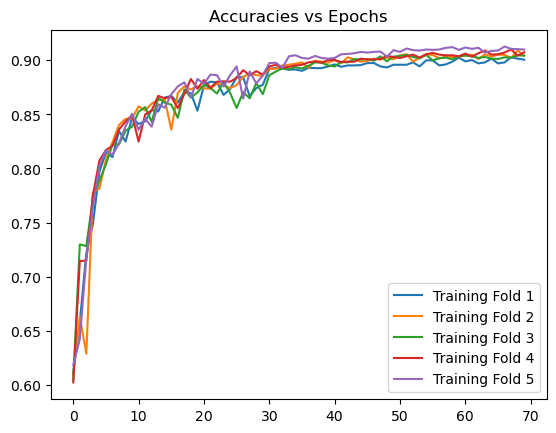

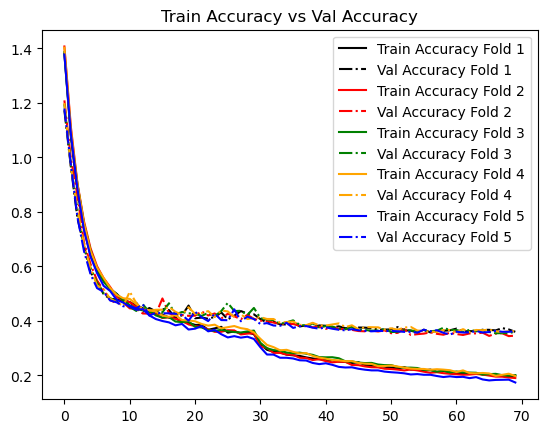

Result on val_Fold:  1
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9088 - loss: 0.3257
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  2
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9093 - loss: 0.3512
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Result on val_Fold:  3
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8936 - loss: 0.3974
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9024 - loss: 0.3801
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9195 - loss: 0.3117
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Trianing Performance of Chr# and Neg# 17 3
Average Accuracy: 0.9050 ± 0.0066
Average Sensitivity: 0.9192 ± 0.0092
Average Specificity: 0.8917 ± 0.0088
Average MCC: 0.8105 ± 0.0133
Average ROC AUC: 0.9570 ± 0.0017
Average PR AUC: 0.9556 ± 0.0051
#########################

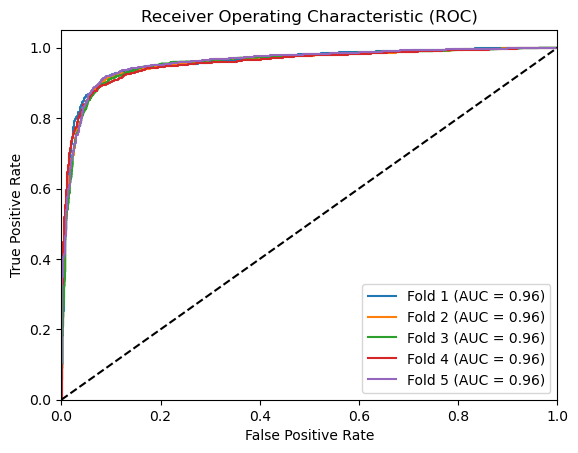

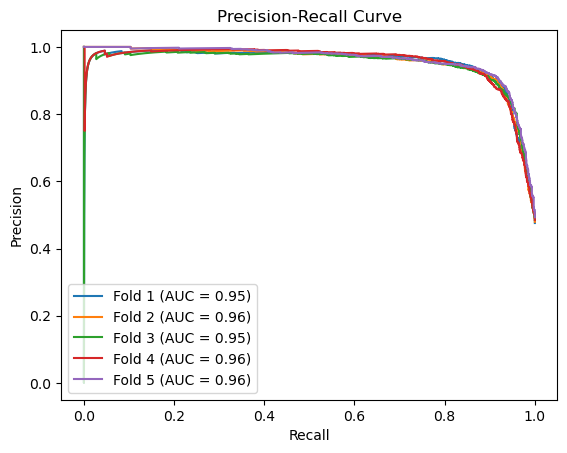

19982 2001 4
(19982, 2001, 4) (19982, 1, 1024) (19982,)
(19982, 2001, 4) (19982, 1, 1024) (19982, 1)
(19982, 2001, 4) (19982, 1, 1024) (19982, 1)
(15985, 2001, 4) (3997, 2001, 4)
(15985, 2001, 4) (3997, 2001, 4)
(15986, 2001, 4) (3996, 2001, 4)
(15986, 2001, 4) (3996, 2001, 4)
(15986, 2001, 4) (3996, 2001, 4)
(15985, 1, 1024) (3997, 1, 1024)
(15985, 1, 1024) (3997, 1, 1024)
(15986, 1, 1024) (3996, 1, 1024)
(15986, 1, 1024) (3996, 1, 1024)
(15986, 1, 1024) (3996, 1, 1024)
Training on Fold:  1


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_80      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_80 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_80[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_80    │ (None, 133, 64)   │          0 │ conv1d_80[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_120         │ (None, 133, 64)   │          0 │ max_pooling1d_80… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_81 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_120[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_81    │ (None, 8, 128)    │          0 │ conv1d_81[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_81      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_121         │ (None, 8, 128)    │          0 │ max_pooling1d_81… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_81[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_80          │ (None, 1024)      │          0 │ dropout_121[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_81          │ (None, 64)        │          0 │ dense_80[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_40      │ (None, 1088)      │          0 │ flatten_80[0][0], │
│ (Concatenate)       │                   │            │ flatten_81[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_122         │ (None, 1088)      │          0 │ concatenate_40[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_81 (Dense)    │ (None, 1)         │      1,089 │ dropout_122[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5299 - loss: 1.7699
Epoch 1: val_loss improved from inf to 1.21557, saving model to Chr17/sec_folds_4/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5300 - loss: 1.7682 - val_accuracy: 0.5987 - val_loss: 1.2156 - learning_rate: 0.0010
0.001
Epoch 2/70
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6155 - loss: 1.1541
Epoch 2: val_loss improved from 1.21557 to 1.00240, saving model to Chr17/sec_folds_4/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6156 - loss: 1.1536 - val_accuracy: 0.7119 - val_loss: 1.0024 - learning_rate: 0.0010
0.001
Epoch 3/70
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6566 - loss: 0.9606
Epoch 3: val_loss improved from 1.00240 to 0.82447, saving model to Chr17/sec_folds_4/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6571 - loss: 0.9589 - val_accuracy: 0.7194 - val_loss: 0.8245 - learning_rate: 0.0010
0.0

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_82      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_82 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_82[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_82    │ (None, 133, 64)   │          0 │ conv1d_82[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_123         │ (None, 133, 64)   │          0 │ max_pooling1d_82… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_83 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_123[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_83    │ (None, 8, 128)    │          0 │ conv1d_83[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_83      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_124         │ (None, 8, 128)    │          0 │ max_pooling1d_83… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_83[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_82          │ (None, 1024)      │          0 │ dropout_124[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_83          │ (None, 64)        │          0 │ dense_82[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_41      │ (None, 1088)      │          0 │ flatten_82[0][0], │
│ (Concatenate)       │                   │            │ flatten_83[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_125         │ (None, 1088)      │          0 │ concatenate_41[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 1)         │      1,089 │ dropout_125[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5167 - loss: 1.8341
Epoch 1: val_loss improved from inf to 1.21617, saving model to Chr17/sec_folds_4/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5168 - loss: 1.8322 - val_accuracy: 0.6325 - val_loss: 1.2162 - learning_rate: 0.0010
0.001
Epoch 2/70
194/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6361 - loss: 1.1666
Epoch 2: val_loss improved from 1.21617 to 1.03332, saving model to Chr17/sec_folds_4/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6363 - loss: 1.1649 - val_accuracy: 0.6659 - val_loss: 1.0333 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6610 - loss: 0.9858
Epoch 3: val_loss improved from 1.03332 to 0.85533, saving model to Chr17/sec_folds_4/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6613 - loss: 0.9851 - val_accuracy: 0.7366 - val_loss: 0.8553 - learning_rate: 0.0010
0.0

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_84      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_84 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_84[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_84    │ (None, 133, 64)   │          0 │ conv1d_84[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_126         │ (None, 133, 64)   │          0 │ max_pooling1d_84… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_85 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_126[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_85    │ (None, 8, 128)    │          0 │ conv1d_85[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_85      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_127         │ (None, 8, 128)    │          0 │ max_pooling1d_85… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_85[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_84          │ (None, 1024)      │          0 │ dropout_127[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_85          │ (None, 64)        │          0 │ dense_84[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_42      │ (None, 1088)      │          0 │ flatten_84[0][0], │
│ (Concatenate)       │                   │            │ flatten_85[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_128         │ (None, 1088)      │          0 │ concatenate_42[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 1)         │      1,089 │ dropout_128[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5332 - loss: 1.7873
Epoch 1: val_loss improved from inf to 1.21860, saving model to Chr17/sec_folds_4/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5334 - loss: 1.7855 - val_accuracy: 0.6001 - val_loss: 1.2186 - learning_rate: 0.0010
0.001
Epoch 2/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6031 - loss: 1.1719
Epoch 2: val_loss improved from 1.21860 to 1.01588, saving model to Chr17/sec_folds_4/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6035 - loss: 1.1706 - val_accuracy: 0.6826 - val_loss: 1.0159 - learning_rate: 0.0010
0.001
Epoch 3/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6646 - loss: 0.9697
Epoch 3: val_loss improved from 1.01588 to 0.83791, saving model to Chr17/sec_folds_4/best_2_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6646 - loss: 0.9695 - val_accuracy: 0.7395 - val_loss: 0.8379 - learning_rate: 0.0010
0.0

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_86      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_86 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_86[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_86    │ (None, 133, 64)   │          0 │ conv1d_86[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_129         │ (None, 133, 64)   │          0 │ max_pooling1d_86… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_87 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_129[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_87    │ (None, 8, 128)    │          0 │ conv1d_87[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_87      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_130         │ (None, 8, 128)    │          0 │ max_pooling1d_87… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_87[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_86          │ (None, 1024)      │          0 │ dropout_130[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_87          │ (None, 64)        │          0 │ dense_86[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_43      │ (None, 1088)      │          0 │ flatten_86[0][0], │
│ (Concatenate)       │                   │            │ flatten_87[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_131         │ (None, 1088)      │          0 │ concatenate_43[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 1)         │      1,089 │ dropout_131[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5210 - loss: 1.7445
Epoch 1: val_loss improved from inf to 1.22197, saving model to Chr17/sec_folds_4/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5211 - loss: 1.7429 - val_accuracy: 0.5901 - val_loss: 1.2220 - learning_rate: 0.0010
0.001
Epoch 2/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5867 - loss: 1.1780
Epoch 2: val_loss improved from 1.22197 to 1.01398, saving model to Chr17/sec_folds_4/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5870 - loss: 1.1772 - val_accuracy: 0.6660 - val_loss: 1.0140 - learning_rate: 0.0010
0.001
Epoch 3/70
194/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6521 - loss: 0.9748
Epoch 3: val_loss improved from 1.01398 to 0.85090, saving model to Chr17/sec_folds_4/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6524 - loss: 0.9735 - val_accuracy: 0.6929 - val_loss: 0.8509 - learning_rate: 0.0010
0.0

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_88      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_88 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_88[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_88    │ (None, 133, 64)   │          0 │ conv1d_88[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_132         │ (None, 133, 64)   │          0 │ max_pooling1d_88… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_89 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_132[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_89    │ (None, 8, 128)    │          0 │ conv1d_89[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_89      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_133         │ (None, 8, 128)    │          0 │ max_pooling1d_89… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_89[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_88          │ (None, 1024)      │          0 │ dropout_133[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_89          │ (None, 64)        │          0 │ dense_88[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_44      │ (None, 1088)      │          0 │ flatten_88[0][0], │
│ (Concatenate)       │                   │            │ flatten_89[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_134         │ (None, 1088)      │          0 │ concatenate_44[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_89 (Dense)    │ (None, 1)         │      1,089 │ dropout_134[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5333 - loss: 1.6908
Epoch 1: val_loss improved from inf to 1.21756, saving model to Chr17/sec_folds_4/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5334 - loss: 1.6893 - val_accuracy: 0.5353 - val_loss: 1.2176 - learning_rate: 0.0010
0.001
Epoch 2/70
195/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5958 - loss: 1.1552
Epoch 2: val_loss improved from 1.21756 to 1.00748, saving model to Chr17/sec_folds_4/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5957 - loss: 1.1540 - val_accuracy: 0.6385 - val_loss: 1.0075 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6389 - loss: 0.9641
Epoch 3: val_loss improved from 1.00748 to 0.84940, saving model to Chr17/sec_folds_4/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6388 - loss: 0.9636 - val_accuracy: 0.6610 - val_loss: 0.8494 - learning_rate: 0.0010
0.0

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_90      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_90 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_90[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_90    │ (None, 133, 64)   │          0 │ conv1d_90[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_135         │ (None, 133, 64)   │          0 │ max_pooling1d_90… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_91 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_135[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_91    │ (None, 8, 128)    │          0 │ conv1d_91[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_91      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_136         │ (None, 8, 128)    │          0 │ max_pooling1d_91… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_90 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_91[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_90          │ (None, 1024)      │          0 │ dropout_136[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_91          │ (None, 64)        │          0 │ dense_90[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_45      │ (None, 1088)      │          0 │ flatten_90[0][0], │
│ (Concatenate)       │                   │            │ flatten_91[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_137         │ (None, 1088)      │          0 │ concatenate_45[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_91 (Dense)    │ (None, 1)         │      1,089 │ dropout_137[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

/home/tahirm2/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5246 - loss: 1.7870
Epoch 1: val_loss improved from inf to 1.22694, saving model to Chr17/sec_folds_5/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5247 - loss: 1.7853 - val_accuracy: 0.5812 - val_loss: 1.2269 - learning_rate: 0.0010
0.001
Epoch 2/70
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5987 - loss: 1.1827
Epoch 2: val_loss improved from 1.22694 to 1.01352, saving model to Chr17/sec_folds_5/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5991 - loss: 1.1814 - val_accuracy: 0.6853 - val_loss: 1.0135 - learning_rate: 0.0010
0.001
Epoch 3/70
195/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6646 - loss: 0.9779
Epoch 3: val_loss improved from 1.01352 to 0.85312, saving model to Chr17/sec_folds_5/best_0_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6647 - loss: 0.9769 - val_accuracy: 0.7241 - val_loss: 0.8531 - learning_rate: 0.0010
0.

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_92      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_92 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_92[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_92    │ (None, 133, 64)   │          0 │ conv1d_92[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_138         │ (None, 133, 64)   │          0 │ max_pooling1d_92… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_93 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_138[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_93    │ (None, 8, 128)    │          0 │ conv1d_93[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_93      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_139         │ (None, 8, 128)    │          0 │ max_pooling1d_93… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_92 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_93[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_92          │ (None, 1024)      │          0 │ dropout_139[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_93          │ (None, 64)        │          0 │ dense_92[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_46      │ (None, 1088)      │          0 │ flatten_92[0][0], │
│ (Concatenate)       │                   │            │ flatten_93[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_140         │ (None, 1088)      │          0 │ concatenate_46[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_93 (Dense)    │ (None, 1)         │      1,089 │ dropout_140[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5375 - loss: 1.6536
Epoch 1: val_loss improved from inf to 1.19457, saving model to Chr17/sec_folds_5/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5376 - loss: 1.6523 - val_accuracy: 0.6184 - val_loss: 1.1946 - learning_rate: 0.0010
0.001
Epoch 2/70
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6018 - loss: 1.1456
Epoch 2: val_loss improved from 1.19457 to 0.97818, saving model to Chr17/sec_folds_5/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6026 - loss: 1.1434 - val_accuracy: 0.6747 - val_loss: 0.9782 - learning_rate: 0.0010
0.001
Epoch 3/70
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6578 - loss: 0.9433
Epoch 3: val_loss improved from 0.97818 to 0.80982, saving model to Chr17/sec_folds_5/best_1_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6580 - loss: 0.9428 - val_accuracy: 0.7385 - val_loss: 0.8098 - learning_rate: 0.0010
0.0

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_96      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_96 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_96[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_96    │ (None, 133, 64)   │          0 │ conv1d_96[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_144         │ (None, 133, 64)   │          0 │ max_pooling1d_96… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_97 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_144[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_97    │ (None, 8, 128)    │          0 │ conv1d_97[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_97      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_145         │ (None, 8, 128)    │          0 │ max_pooling1d_97… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_96 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_97[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_96          │ (None, 1024)      │          0 │ dropout_145[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_97          │ (None, 64)        │          0 │ dense_96[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_48      │ (None, 1088)      │          0 │ flatten_96[0][0], │
│ (Concatenate)       │                   │            │ flatten_97[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_146         │ (None, 1088)      │          0 │ concatenate_48[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_97 (Dense)    │ (None, 1)         │      1,089 │ dropout_146[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5372 - loss: 1.6589
Epoch 1: val_loss improved from inf to 1.18714, saving model to Chr17/sec_folds_5/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5374 - loss: 1.6576 - val_accuracy: 0.6154 - val_loss: 1.1871 - learning_rate: 0.0010
0.001
Epoch 2/70
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6001 - loss: 1.1335
Epoch 2: val_loss improved from 1.18714 to 0.97134, saving model to Chr17/sec_folds_5/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6002 - loss: 1.1330 - val_accuracy: 0.6576 - val_loss: 0.9713 - learning_rate: 0.0010
0.001
Epoch 3/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6527 - loss: 0.9285
Epoch 3: val_loss improved from 0.97134 to 0.79548, saving model to Chr17/sec_folds_5/best_3_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6528 - loss: 0.9283 - val_accuracy: 0.7045 - val_loss: 0.7955 - learning_rate: 0.0010
0.0

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_98      │ (None, 2001, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_98 (Conv1D)  │ (None, 2001, 64)  │      5,952 │ input_layer_98[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_98    │ (None, 133, 64)   │          0 │ conv1d_98[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_147         │ (None, 133, 64)   │          0 │ max_pooling1d_98… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_99 (Conv1D)  │ (None, 133, 128)  │    270,464 │ dropout_147[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_99    │ (None, 8, 128)    │          0 │ conv1d_99[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_99      │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_148         │ (None, 8, 128)    │          0 │ max_pooling1d_99… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_98 (Dense)    │ (None, 1, 64)     │     65,600 │ input_layer_99[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_98          │ (None, 1024)      │          0 │ dropout_148[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_99          │ (None, 64)        │          0 │ dense_98[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_49      │ (None, 1088)      │          0 │ flatten_98[0][0], │
│ (Concatenate)       │                   │            │ flatten_99[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_149         │ (None, 1088)      │          0 │ concatenate_49[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_99 (Dense)    │ (None, 1)         │      1,089 │ dropout_149[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 343,105 (1.31 MB)

 Trainable params: 343,105 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0.001
Epoch 1/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5321 - loss: 1.6532
Epoch 1: val_loss improved from inf to 1.17695, saving model to Chr17/sec_folds_5/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5322 - loss: 1.6518 - val_accuracy: 0.6082 - val_loss: 1.1769 - learning_rate: 0.0010
0.001
Epoch 2/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6024 - loss: 1.1277
Epoch 2: val_loss improved from 1.17695 to 0.93250, saving model to Chr17/sec_folds_5/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6027 - loss: 1.1266 - val_accuracy: 0.7001 - val_loss: 0.9325 - learning_rate: 0.0010
0.001
Epoch 3/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6726 - loss: 0.9061
Epoch 3: val_loss improved from 0.93250 to 0.78024, saving model to Chr17/sec_folds_5/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6726 - loss: 0.9056 - val_accuracy: 0.7308 - val_loss: 0.7802 - learning_rate: 0.0010
0.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.2005
Epoch 59: val_loss did not improve from 0.36292
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9478 - loss: 0.2005 - val_accuracy: 0.8987 - val_loss: 0.3685 - learning_rate: 1.0000e-04
0.0001
Epoch 60/70
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9495 - loss: 0.2022
Epoch 60: val_loss did not improve from 0.36292
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9494 - loss: 0.2021 - val_accuracy: 0.9024 - val_loss: 0.3647 - learning_rate: 1.0000e-04
0.0001
Epoch 61/70
195/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9514 - loss: 0.1981
Epoch 61: val_loss improved from 0.36292 to 0.36212, saving model to Chr17/sec_folds_5/best_4_.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9514 - loss: 0.1981 - val_accuracy: 0.9018 - val_loss: 0.3621 - learning_rate: 1.0000e-04
0.0001
Epoch 62/70
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.1959
Epoch 62: v

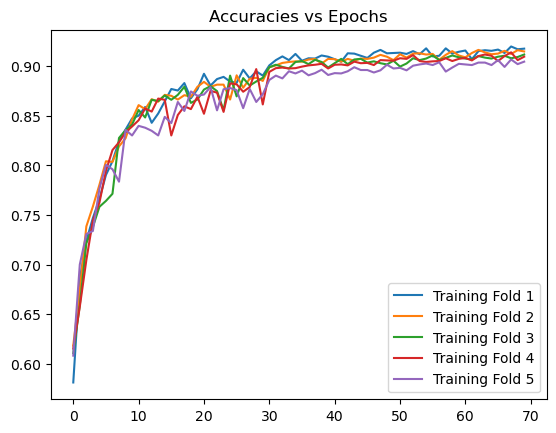

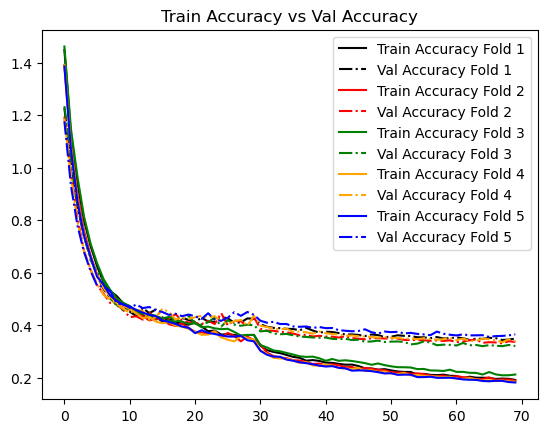

Result on val_Fold:  1
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9030 - loss: 0.3707
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Result on val_Fold:  2
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8958 - loss: 0.3989
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8978 - loss: 0.3450
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8996 - loss: 0.3670
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
4124 2001 4
Result on val_Fold:  1
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  2
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  3
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  4
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Result on val_Fold:  5
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
################################## Testing Performance of Chr# and Neg# 17 5
Average Accuracy: 0.7918 ± 0.0140
A

In [4]:
for chr in range (1,24):
    print ("Chromosome # ", chr)
    print("##########################################################")

    for neg in range (1,6):
        print ("Negative # ", neg)
        print("##########################################################")
        
        pos_seq = []
        for seq_record in SeqIO.parse(f'Chr{chr}/Training_Chr_{chr}.txt', "fasta"):
            pos_seq.append(str(seq_record.seq))
        
        len(pos_seq)
        
        neg_seq = []
        for seq_record in SeqIO.parse(f'Chr{chr}/Training_neg_Chr_{chr}_{neg}.txt', "fasta"):
            neg_seq.append(str(seq_record.seq))
        
        len(neg_seq)
        
        combine_seqs = pos_seq + neg_seq
        
        import re
        def get_feature(all_seqs,patterns):
            all_feat = []
            for seq in all_seqs:
                feat= np.zeros((1,len(patterns)))
                ix=0
                for ix, pattern in enumerate(patterns):
                    pat='(?='+pattern+')'
                    featcnt=len(re.findall(pat,seq))
                    feat[0,ix] = featcnt
                    ix+=1
                all_feat.append(feat)
            return np.asarray(all_feat)
            
        #patterns= ['A','C','T','G']
        #patterns= ['AA','AC','AU','AG','CA','CC','CU','CG','UA','UC','UU','UG','GA','GC','GU','GG']
        #patterns= ['AAA','AAC','AAT','AAG','ACA','ACC','ACT', 'ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT', 'AGG','CAA','CAC','CAT','CAG','TAA','TAC','TAT', 'TAG','GAA','GAC','GAT','GAG','CCA','CCC','CCT', 'CCG','TTA','TTC','TTT','TTG','GGA','GGC','GGT', 'GGG','TCA','TCC','TCT','TCG','GCA','GCC','GCT','GCG','CTA','CTC','CTT','CTG','GTA','GTC','GTT','AGG','CGA','CGC','CGT','GGG','TTT','ATA','CTA', 'GTA']#patterns=['AAAA','AAAC','AAAG','AAAU','AACA','AACC','AACG','AACU','AAGA','AAGC','AAGG','AAGU','AAUA','AAUC','AAUG','AAUU','ACAA','ACAC','ACAG','ACAU','ACCA','ACCC','ACCG','ACCU','ACGA','ACGC','ACGG','ACGU','ACUA','ACUC','ACUG','ACUU','AGAA','AGAC','AGAG','AGAU','AGCA','AGCC','AGCG','AGCU','AGGA','AGGC','AGGG','AGGU','AGUA','AGUC','AGUG','AGUU','AUAA','AUAC','AUAG','AUAU','AUCA','AUCC','AUCG','AUCU','AUGA','AUGC','AUGG','AUGU','AUUA','AUUC','AUUG','AUUU','CAAA','CAAC','CAAG','CAAU','CACA','CACC','CACG','CACU','CAGA','CAGC','CAGG','CAGU','CAUA','CAUC','CAUG','CAUU','CCAA','CCAC','CCAG','CCAU','CCCA','CCCC','CCCG','CCCU','CCGA','CCGC','CCGG','CCGU','CCUA','CCUC','CCUG','CCUU','CGAA','CGAC','CGAG','CGAU','CGCA','CGCC','CGCG','CGCU','CGGA','CGGC','CGGG','CGGU','CGUA','CGUC','CGUG','CGUU','CUAA','CUAC','CUAG','CUAU','CUCA','CUCC','CUCG','CUCU','CUGA','CUGC','CUGG','CUGU','CUUA','CUUC','CUUG','CUUU','GAAA','GAAC','GAAG','GAAU','GACA','GACC','GACG','GACU','GAGA','GAGC','GAGG','GAGU','GAUA','GAUC','GAUG','GAUU','GCAA','GCAC','GCAG','GCAU','GCCA','GCCC','GCCG','GCCU','GCGA','GCGC','GCGG','GCGU','GCUA','GCUC','GCUG','GCUU','GGAA','GGAC','GGAG','GGAU','GGCA','GGCC','GGCG','GGCU','GGGA','GGGC','GGGG','GGGU','GGUA','GGUC','GGUG','GGUU','GUAA','GUAC','GUAG','GUAU','GUCA','GUCC','GUCG','GUCU','GUGA','GUGC','GUGG','GUGU','GUUA','GUUC','GUUG','GUUU','UAAA','UAAC','UAAG','UAAU','UACA','UACC','UACG','UACU','UAGA','UAGC','UAGG','UAGU','UAUA','UAUC','UAUG','UAUU','UCAA','UCAC','UCAG','UCAU','UCCA','UCCC','UCCG','UCCU','UCGA','UCGC','UCGG','UCGU','UCUA','UCUC','UCUG','UCUU','UGAA','UGAC','UGAG','UGAU','UGCA','UGCC','UGCG','UGCU','UGGA','UGGC','UGGG','UGGU','UGUA','UGUC','UGUG','UGUU','UUAA','UUAC','UUAG','UUAU','UUCA','UUCC','UUCG','UUCU','UUGA','UUGC','UUGG','UUGU','UUUA','UUUC','UUUG','UUUU']
        #patterns=['AAAA','AAAC','AAAG','AAAT','AACA','AACC','AACG','AACT','AAGA','AAGC','AAGG','AAGT','AATA','AATC','AATG','AATT','ACAA','ACAC','ACAG','ACAT','ACCA','ACCC','ACCG','ACCT','ACGA','ACGC','ACGG','ACGT','ACTA','ACTC','ACTG','ACTT','AGAA','AGAC','AGAG','AGAT','AGCA','AGCC','AGCG','AGCT','AGGA','AGGC','AGGG','AGGT','AGTA','AGTC','AGTG','AGTT','ATAA','ATAC','ATAG','ATAT','ATCA','ATCC','ATCG','ATCT','ATGA','ATGC','ATGG','ATGT','ATTA','ATTC','ATTG','ATTT','CAAA','CAAC','CAAG','CAAT','CACA','CACC','CACG','CACT','CAGA','CAGC','CAGG','CAGT','CATA','CATC','CATG','CATT','CCAA','CCAC','CCAG','CCAT','CCCA','CCCC','CCCG','CCCT','CCGA','CCGC','CCGG','CCGT','CCTA','CCTC','CCTG','CCTT','CGAA','CGAC','CGAG','CGAT','CGCA','CGCC','CGCG','CGCT','CGGA','CGGC','CGGG','CGGT','CGTA','CGTC','CGTG','CGTT','CTAA','CTAC','CTAG','CTAT','CTCA','CTCC','CTCG','CTCT','CTGA','CTGC','CTGG','CTGT','CTTA','CTTC','CTTG','CTTT','GAAA','GAAC','GAAG','GAAT','GACA','GACC','GACG','GACT','GAGA','GAGC','GAGG','GAGT','GATA','GATC','GATG','GATT','GCAA','GCAC','GCAG','GCAT','GCCA','GCCC','GCCG','GCCT','GCGA','GCGC','GCGG','GCGT','GCTA','GCTC','GCTG','GCTT','GGAA','GGAC','GGAG','GGAT','GGCA','GGCC','GGCG','GGCT','GGGA','GGGC','GGGG','GGGT','GGTA','GGTC','GGTG','GGTT','GTAA','GTAC','GTAG','GTAT','GTCA','GTCC','GTCG','GTCT','GTGA','GTGC','GTGG','GTGT','GTTA','GTTC','GTTG','GTTT','TAAA','TAAC','TAAG','TAAT','TACA','TACC','TACG','TACT','TAGA','TAGC','TAGG','TAGT','TATA','TATC','TATG','TATT','TCAA','TCAC','TCAG','TCAT','TCCA','TCCC','TCCG','TCCT','TCGA','TCGC','TCGG','TCGT','TCTA','TCTC','TCTG','TCTT','TGAA','TGAC','TGAG','TGAT','TGCA','TGCC','TGCG','TGCT','TGGA','TGGC','TGGG','TGGT','TGTA','TGTC','TGTG','TGTT','TTAA','TTAC','TTAG','TTAT','TTCA','TTCC','TTCG','TTCT','TTGA','TTGC','TTGG','TTGT','TTTA','TTTC','TTTG','TTTT']
        patterns=['AAAAA','AAAAC','AAAAG','AAAAT','AAACA','AAACC','AAACG','AAACT','AAAGA','AAAGC','AAAGG','AAAGT','AAATA','AAATC','AAATG','AAATT','AACAA','AACAC','AACAG','AACAT','AACCA','AACCC','AACCG','AACCT','AACGA','AACGC','AACGG','AACGT','AACTA','AACTC','AACTG','AACTT','AAGAA','AAGAC','AAGAG','AAGAT','AAGCA','AAGCC','AAGCG','AAGCT','AAGGA','AAGGC','AAGGG','AAGGT','AAGTA','AAGTC','AAGTG','AAGTT','AATAA','AATAC','AATAG','AATAT','AATCA','AATCC','AATCG','AATCT','AATGA','AATGC','AATGG','AATGT','AATTA','AATTC','AATTG','AATTT','ACAAA','ACAAC','ACAAG','ACAAT','ACACA','ACACC','ACACG','ACACT','ACAGA','ACAGC','ACAGG','ACAGT','ACATA','ACATC','ACATG','ACATT','ACCAA','ACCAC','ACCAG','ACCAT','ACCCA','ACCCC','ACCCG','ACCCT','ACCGA','ACCGC','ACCGG','ACCGT','ACCTA','ACCTC','ACCTG','ACCTT','ACGAA','ACGAC','ACGAG','ACGAT','ACGCA','ACGCC','ACGCG','ACGCT','ACGGA','ACGGC','ACGGG','ACGGT','ACGTA','ACGTC','ACGTG','ACGTT','ACTAA','ACTAC','ACTAG','ACTAT','ACTCA','ACTCC','ACTCG','ACTCT','ACTGA','ACTGC','ACTGG','ACTGT','ACTTA','ACTTC','ACTTG','ACTTT','AGAAA','AGAAC','AGAAG','AGAAT','AGACA','AGACC','AGACG','AGACT','AGAGA','AGAGC','AGAGG','AGAGT','AGATA','AGATC','AGATG','AGATT','AGCAA','AGCAC','AGCAG','AGCAT','AGCCA','AGCCC','AGCCG','AGCCT','AGCGA','AGCGC','AGCGG','AGCGT','AGCTA','AGCTC','AGCTG','AGCTT','AGGAA','AGGAC','AGGAG','AGGAT','AGGCA','AGGCC','AGGCG','AGGCT','AGGGA','AGGGC','AGGGG','AGGGT','AGGTA','AGGTC','AGGTG','AGGTT','AGTAA','AGTAC','AGTAG','AGTAT','AGTCA','AGTCC','AGTCG','AGTCT','AGTGA','AGTGC','AGTGG','AGTGT','AGTTA','AGTTC','AGTTG','AGTTT','ATAAA','ATAAC','ATAAG','ATAAT','ATACA','ATACC','ATACG','ATACT','ATAGA','ATAGC','ATAGG','ATAGT','ATATA','ATATC','ATATG','ATATT','ATCAA','ATCAC','ATCAG','ATCAT','ATCCA','ATCCC','ATCCG','ATCCT','ATCGA','ATCGC','ATCGG','ATCGT','ATCTA','ATCTC','ATCTG','ATCTT','ATGAA','ATGAC','ATGAG','ATGAT','ATGCA','ATGCC','ATGCG','ATGCT','ATGGA','ATGGC','ATGGG','ATGGT','ATGTA','ATGTC','ATGTG','ATGTT','ATTAA','ATTAC','ATTAG','ATTAT','ATTCA','ATTCC','ATTCG','ATTCT','ATTGA','ATTGC','ATTGG','ATTGT','ATTTA','ATTTC','ATTTG','ATTTT','CAAAA','CAAAC','CAAAG','CAAAT','CAACA','CAACC','CAACG','CAACT','CAAGA','CAAGC','CAAGG','CAAGT','CAATA','CAATC','CAATG','CAATT','CACAA','CACAC','CACAG','CACAT','CACCA','CACCC','CACCG','CACCT','CACGA','CACGC','CACGG','CACGT','CACTA','CACTC','CACTG','CACTT','CAGAA','CAGAC','CAGAG','CAGAT','CAGCA','CAGCC','CAGCG','CAGCT','CAGGA','CAGGC','CAGGG','CAGGT','CAGTA','CAGTC','CAGTG','CAGTT','CATAA','CATAC','CATAG','CATAT','CATCA','CATCC','CATCG','CATCT','CATGA','CATGC','CATGG','CATGT','CATTA','CATTC','CATTG','CATTT','CCAAA','CCAAC','CCAAG','CCAAT','CCACA','CCACC','CCACG','CCACT','CCAGA','CCAGC','CCAGG','CCAGT','CCATA','CCATC','CCATG','CCATT','CCCAA','CCCAC','CCCAG','CCCAT','CCCCA','CCCCC','CCCCG','CCCCT','CCCGA','CCCGC','CCCGG','CCCGT','CCCTA','CCCTC','CCCTG','CCCTT','CCGAA','CCGAC','CCGAG','CCGAT','CCGCA','CCGCC','CCGCG','CCGCT','CCGGA','CCGGC','CCGGG','CCGGT','CCGTA','CCGTC','CCGTG','CCGTT','CCTAA','CCTAC','CCTAG','CCTAT','CCTCA','CCTCC','CCTCG','CCTCT','CCTGA','CCTGC','CCTGG','CCTGT','CCTTA','CCTTC','CCTTG','CCTTT','CGAAA','CGAAC','CGAAG','CGAAT','CGACA','CGACC','CGACG','CGACT','CGAGA','CGAGC','CGAGG','CGAGT','CGATA','CGATC','CGATG','CGATT','CGCAA','CGCAC','CGCAG','CGCAT','CGCCA','CGCCC','CGCCG','CGCCT','CGCGA','CGCGC','CGCGG','CGCGT','CGCTA','CGCTC','CGCTG','CGCTT','CGGAA','CGGAC','CGGAG','CGGAT','CGGCA','CGGCC','CGGCG','CGGCT','CGGGA','CGGGC','CGGGG','CGGGT','CGGTA','CGGTC','CGGTG','CGGTT','CGTAA','CGTAC','CGTAG','CGTAT','CGTCA','CGTCC','CGTCG','CGTCT','CGTGA','CGTGC','CGTGG','CGTGT','CGTTA','CGTTC','CGTTG','CGTTT','CTAAA','CTAAC','CTAAG','CTAAT','CTACA','CTACC','CTACG','CTACT','CTAGA','CTAGC','CTAGG','CTAGT','CTATA','CTATC','CTATG','CTATT','CTCAA','CTCAC','CTCAG','CTCAT','CTCCA','CTCCC','CTCCG','CTCCT','CTCGA','CTCGC','CTCGG','CTCGT','CTCTA','CTCTC','CTCTG','CTCTT','CTGAA','CTGAC','CTGAG','CTGAT','CTGCA','CTGCC','CTGCG','CTGCT','CTGGA','CTGGC','CTGGG','CTGGT','CTGTA','CTGTC','CTGTG','CTGTT','CTTAA','CTTAC','CTTAG','CTTAT','CTTCA','CTTCC','CTTCG','CTTCT','CTTGA','CTTGC','CTTGG','CTTGT','CTTTA','CTTTC','CTTTG','CTTTT','GAAAA','GAAAC','GAAAG','GAAAT','GAACA','GAACC','GAACG','GAACT','GAAGA','GAAGC','GAAGG','GAAGT','GAATA','GAATC','GAATG','GAATT','GACAA','GACAC','GACAG','GACAT','GACCA','GACCC','GACCG','GACCT','GACGA','GACGC','GACGG','GACGT','GACTA','GACTC','GACTG','GACTT','GAGAA','GAGAC','GAGAG','GAGAT','GAGCA','GAGCC','GAGCG','GAGCT','GAGGA','GAGGC','GAGGG','GAGGT','GAGTA','GAGTC','GAGTG','GAGTT','GATAA','GATAC','GATAG','GATAT','GATCA','GATCC','GATCG','GATCT','GATGA','GATGC','GATGG','GATGT','GATTA','GATTC','GATTG','GATTT','GCAAA','GCAAC','GCAAG','GCAAT','GCACA','GCACC','GCACG','GCACT','GCAGA','GCAGC','GCAGG','GCAGT','GCATA','GCATC','GCATG','GCATT','GCCAA','GCCAC','GCCAG','GCCAT','GCCCA','GCCCC','GCCCG','GCCCT','GCCGA','GCCGC','GCCGG','GCCGT','GCCTA','GCCTC','GCCTG','GCCTT','GCGAA','GCGAC','GCGAG','GCGAT','GCGCA','GCGCC','GCGCG','GCGCT','GCGGA','GCGGC','GCGGG','GCGGT','GCGTA','GCGTC','GCGTG','GCGTT','GCTAA','GCTAC','GCTAG','GCTAT','GCTCA','GCTCC','GCTCG','GCTCT','GCTGA','GCTGC','GCTGG','GCTGT','GCTTA','GCTTC','GCTTG','GCTTT','GGAAA','GGAAC','GGAAG','GGAAT','GGACA','GGACC','GGACG','GGACT','GGAGA','GGAGC','GGAGG','GGAGT','GGATA','GGATC','GGATG','GGATT','GGCAA','GGCAC','GGCAG','GGCAT','GGCCA','GGCCC','GGCCG','GGCCT','GGCGA','GGCGC','GGCGG','GGCGT','GGCTA','GGCTC','GGCTG','GGCTT','GGGAA','GGGAC','GGGAG','GGGAT','GGGCA','GGGCC','GGGCG','GGGCT','GGGGA','GGGGC','GGGGG','GGGGT','GGGTA','GGGTC','GGGTG','GGGTT','GGTAA','GGTAC','GGTAG','GGTAT','GGTCA','GGTCC','GGTCG','GGTCT','GGTGA','GGTGC','GGTGG','GGTGT','GGTTA','GGTTC','GGTTG','GGTTT','GTAAA','GTAAC','GTAAG','GTAAT','GTACA','GTACC','GTACG','GTACT','GTAGA','GTAGC','GTAGG','GTAGT','GTATA','GTATC','GTATG','GTATT','GTCAA','GTCAC','GTCAG','GTCAT','GTCCA','GTCCC','GTCCG','GTCCT','GTCGA','GTCGC','GTCGG','GTCGT','GTCTA','GTCTC','GTCTG','GTCTT','GTGAA','GTGAC','GTGAG','GTGAT','GTGCA','GTGCC','GTGCG','GTGCT','GTGGA','GTGGC','GTGGG','GTGGT','GTGTA','GTGTC','GTGTG','GTGTT','GTTAA','GTTAC','GTTAG','GTTAT','GTTCA','GTTCC','GTTCG','GTTCT','GTTGA','GTTGC','GTTGG','GTTGT','GTTTA','GTTTC','GTTTG','GTTTT','TAAAA','TAAAC','TAAAG','TAAAT','TAACA','TAACC','TAACG','TAACT','TAAGA','TAAGC','TAAGG','TAAGT','TAATA','TAATC','TAATG','TAATT','TACAA','TACAC','TACAG','TACAT','TACCA','TACCC','TACCG','TACCT','TACGA','TACGC','TACGG','TACGT','TACTA','TACTC','TACTG','TACTT','TAGAA','TAGAC','TAGAG','TAGAT','TAGCA','TAGCC','TAGCG','TAGCT','TAGGA','TAGGC','TAGGG','TAGGT','TAGTA','TAGTC','TAGTG','TAGTT','TATAA','TATAC','TATAG','TATAT','TATCA','TATCC','TATCG','TATCT','TATGA','TATGC','TATGG','TATGT','TATTA','TATTC','TATTG','TATTT','TCAAA','TCAAC','TCAAG','TCAAT','TCACA','TCACC','TCACG','TCACT','TCAGA','TCAGC','TCAGG','TCAGT','TCATA','TCATC','TCATG','TCATT','TCCAA','TCCAC','TCCAG','TCCAT','TCCCA','TCCCC','TCCCG','TCCCT','TCCGA','TCCGC','TCCGG','TCCGT','TCCTA','TCCTC','TCCTG','TCCTT','TCGAA','TCGAC','TCGAG','TCGAT','TCGCA','TCGCC','TCGCG','TCGCT','TCGGA','TCGGC','TCGGG','TCGGT','TCGTA','TCGTC','TCGTG','TCGTT','TCTAA','TCTAC','TCTAG','TCTAT','TCTCA','TCTCC','TCTCG','TCTCT','TCTGA','TCTGC','TCTGG','TCTGT','TCTTA','TCTTC','TCTTG','TCTTT','TGAAA','TGAAC','TGAAG','TGAAT','TGACA','TGACC','TGACG','TGACT','TGAGA','TGAGC','TGAGG','TGAGT','TGATA','TGATC','TGATG','TGATT','TGCAA','TGCAC','TGCAG','TGCAT','TGCCA','TGCCC','TGCCG','TGCCT','TGCGA','TGCGC','TGCGG','TGCGT','TGCTA','TGCTC','TGCTG','TGCTT','TGGAA','TGGAC','TGGAG','TGGAT','TGGCA','TGGCC','TGGCG','TGGCT','TGGGA','TGGGC','TGGGG','TGGGT','TGGTA','TGGTC','TGGTG','TGGTT','TGTAA','TGTAC','TGTAG','TGTAT','TGTCA','TGTCC','TGTCG','TGTCT','TGTGA','TGTGC','TGTGG','TGTGT','TGTTA','TGTTC','TGTTG','TGTTT','TTAAA','TTAAC','TTAAG','TTAAT','TTACA','TTACC','TTACG','TTACT','TTAGA','TTAGC','TTAGG','TTAGT','TTATA','TTATC','TTATG','TTATT','TTCAA','TTCAC','TTCAG','TTCAT','TTCCA','TTCCC','TTCCG','TTCCT','TTCGA','TTCGC','TTCGG','TTCGT','TTCTA','TTCTC','TTCTG','TTCTT','TTGAA','TTGAC','TTGAG','TTGAT','TTGCA','TTGCC','TTGCG','TTGCT','TTGGA','TTGGC','TTGGG','TTGGT','TTGTA','TTGTC','TTGTG','TTGTT','TTTAA','TTTAC','TTTAG','TTTAT','TTTCA','TTTCC','TTTCG','TTTCT','TTTGA','TTTGC','TTTGG','TTTGT','TTTTA','TTTTC','TTTTG','TTTTT']
        #patterns= ['A','C','T','G','AA','AC','AT','AG','CA','CC','CT','CG','TA','TC','TT','TG','GA','GC','GT','GG','AAA','AAC','AAT','AAG','ACA','ACC','ACT', 'ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT', 'AGG','CAA','CAC','CAT','CAG','TAA','TAC','TAT', 'TAG','GAA','GAC','GAT','GAG','CCA','CCC','CCT', 'CCG','TTA','TTC','TTT','TTG','GGA','GGC','GGT', 'GGG','TCA','TCC','TCT','TCG','GCA','GCC','GCT','GCG','CTA','CTC','CTT','CTG','GTA','GTC','GTT','AGG','CGA','CGC','CGT','GGG','TTT','ATA','CTA', 'GTA','AAAA','AAAC','AAAG','AAAT','AACA','AACC','AACG','AACT','AAGA','AAGC','AAGG','AAGT','AATA','AATC','AATG','AATT','ACAA','ACAC','ACAG','ACAT','ACCA','ACCC','ACCG','ACCT','ACGA','ACGC','ACGG','ACGT','ACTA','ACTC','ACTG','ACTT','AGAA','AGAC','AGAG','AGAT','AGCA','AGCC','AGCG','AGCT','AGGA','AGGC','AGGG','AGGT','AGTA','AGTC','AGTG','AGTT','ATAA','ATAC','ATAG','ATAT','ATCA','ATCC','ATCG','ATCT','ATGA','ATGC','ATGG','ATGT','ATTA','ATTC','ATTG','ATTT','CAAA','CAAC','CAAG','CAAT','CACA','CACC','CACG','CACT','CAGA','CAGC','CAGG','CAGT','CATA','CATC','CATG','CATT','CCAA','CCAC','CCAG','CCAT','CCCA','CCCC','CCCG','CCCT','CCGA','CCGC','CCGG','CCGT','CCTA','CCTC','CCTG','CCTT','CGAA','CGAC','CGAG','CGAT','CGCA','CGCC','CGCG','CGCT','CGGA','CGGC','CGGG','CGGT','CGTA','CGTC','CGTG','CGTT','CTAA','CTAC','CTAG','CTAT','CTCA','CTCC','CTCG','CTCT','CTGA','CTGC','CTGG','CTGT','CTTA','CTTC','CTTG','CTTT','GAAA','GAAC','GAAG','GAAT','GACA','GACC','GACG','GACT','GAGA','GAGC','GAGG','GAGT','GATA','GATC','GATG','GATT','GCAA','GCAC','GCAG','GCAT','GCCA','GCCC','GCCG','GCCT','GCGA','GCGC','GCGG','GCGT','GCTA','GCTC','GCTG','GCTT','GGAA','GGAC','GGAG','GGAT','GGCA','GGCC','GGCG','GGCT','GGGA','GGGC','GGGG','GGGT','GGTA','GGTC','GGTG','GGTT','GTAA','GTAC','GTAG','GTAT','GTCA','GTCC','GTCG','GTCT','GTGA','GTGC','GTGG','GTGT','GTTA','GTTC','GTTG','GTTT','TAAA','TAAC','TAAG','TAAT','TACA','TACC','TACG','TACT','TAGA','TAGC','TAGG','TAGT','TATA','TATC','TATG','TATT','TCAA','TCAC','TCAG','TCAT','TCCA','TCCC','TCCG','TCCT','TCGA','TCGC','TCGG','TCGT','TCTA','TCTC','TCTG','TCTT','TGAA','TGAC','TGAG','TGAT','TGCA','TGCC','TGCG','TGCT','TGGA','TGGC','TGGG','TGGT','TGTA','TGTC','TGTG','TGTT','TTAA','TTAC','TTAG','TTAT','TTCA','TTCC','TTCG','TTCT','TTGA','TTGC','TTGG','TTGT','TTTA','TTTC','TTTG','TTTT','AAAAA','AAAAC','AAAAG','AAAAT','AAACA','AAACC','AAACG','AAACT','AAAGA','AAAGC','AAAGG','AAAGT','AAATA','AAATC','AAATG','AAATT','AACAA','AACAC','AACAG','AACAT','AACCA','AACCC','AACCG','AACCT','AACGA','AACGC','AACGG','AACGT','AACTA','AACTC','AACTG','AACTT','AAGAA','AAGAC','AAGAG','AAGAT','AAGCA','AAGCC','AAGCG','AAGCT','AAGGA','AAGGC','AAGGG','AAGGT','AAGTA','AAGTC','AAGTG','AAGTT','AATAA','AATAC','AATAG','AATAT','AATCA','AATCC','AATCG','AATCT','AATGA','AATGC','AATGG','AATGT','AATTA','AATTC','AATTG','AATTT','ACAAA','ACAAC','ACAAG','ACAAT','ACACA','ACACC','ACACG','ACACT','ACAGA','ACAGC','ACAGG','ACAGT','ACATA','ACATC','ACATG','ACATT','ACCAA','ACCAC','ACCAG','ACCAT','ACCCA','ACCCC','ACCCG','ACCCT','ACCGA','ACCGC','ACCGG','ACCGT','ACCTA','ACCTC','ACCTG','ACCTT','ACGAA','ACGAC','ACGAG','ACGAT','ACGCA','ACGCC','ACGCG','ACGCT','ACGGA','ACGGC','ACGGG','ACGGT','ACGTA','ACGTC','ACGTG','ACGTT','ACTAA','ACTAC','ACTAG','ACTAT','ACTCA','ACTCC','ACTCG','ACTCT','ACTGA','ACTGC','ACTGG','ACTGT','ACTTA','ACTTC','ACTTG','ACTTT','AGAAA','AGAAC','AGAAG','AGAAT','AGACA','AGACC','AGACG','AGACT','AGAGA','AGAGC','AGAGG','AGAGT','AGATA','AGATC','AGATG','AGATT','AGCAA','AGCAC','AGCAG','AGCAT','AGCCA','AGCCC','AGCCG','AGCCT','AGCGA','AGCGC','AGCGG','AGCGT','AGCTA','AGCTC','AGCTG','AGCTT','AGGAA','AGGAC','AGGAG','AGGAT','AGGCA','AGGCC','AGGCG','AGGCT','AGGGA','AGGGC','AGGGG','AGGGT','AGGTA','AGGTC','AGGTG','AGGTT','AGTAA','AGTAC','AGTAG','AGTAT','AGTCA','AGTCC','AGTCG','AGTCT','AGTGA','AGTGC','AGTGG','AGTGT','AGTTA','AGTTC','AGTTG','AGTTT','ATAAA','ATAAC','ATAAG','ATAAT','ATACA','ATACC','ATACG','ATACT','ATAGA','ATAGC','ATAGG','ATAGT','ATATA','ATATC','ATATG','ATATT','ATCAA','ATCAC','ATCAG','ATCAT','ATCCA','ATCCC','ATCCG','ATCCT','ATCGA','ATCGC','ATCGG','ATCGT','ATCTA','ATCTC','ATCTG','ATCTT','ATGAA','ATGAC','ATGAG','ATGAT','ATGCA','ATGCC','ATGCG','ATGCT','ATGGA','ATGGC','ATGGG','ATGGT','ATGTA','ATGTC','ATGTG','ATGTT','ATTAA','ATTAC','ATTAG','ATTAT','ATTCA','ATTCC','ATTCG','ATTCT','ATTGA','ATTGC','ATTGG','ATTGT','ATTTA','ATTTC','ATTTG','ATTTT','CAAAA','CAAAC','CAAAG','CAAAT','CAACA','CAACC','CAACG','CAACT','CAAGA','CAAGC','CAAGG','CAAGT','CAATA','CAATC','CAATG','CAATT','CACAA','CACAC','CACAG','CACAT','CACCA','CACCC','CACCG','CACCT','CACGA','CACGC','CACGG','CACGT','CACTA','CACTC','CACTG','CACTT','CAGAA','CAGAC','CAGAG','CAGAT','CAGCA','CAGCC','CAGCG','CAGCT','CAGGA','CAGGC','CAGGG','CAGGT','CAGTA','CAGTC','CAGTG','CAGTT','CATAA','CATAC','CATAG','CATAT','CATCA','CATCC','CATCG','CATCT','CATGA','CATGC','CATGG','CATGT','CATTA','CATTC','CATTG','CATTT','CCAAA','CCAAC','CCAAG','CCAAT','CCACA','CCACC','CCACG','CCACT','CCAGA','CCAGC','CCAGG','CCAGT','CCATA','CCATC','CCATG','CCATT','CCCAA','CCCAC','CCCAG','CCCAT','CCCCA','CCCCC','CCCCG','CCCCT','CCCGA','CCCGC','CCCGG','CCCGT','CCCTA','CCCTC','CCCTG','CCCTT','CCGAA','CCGAC','CCGAG','CCGAT','CCGCA','CCGCC','CCGCG','CCGCT','CCGGA','CCGGC','CCGGG','CCGGT','CCGTA','CCGTC','CCGTG','CCGTT','CCTAA','CCTAC','CCTAG','CCTAT','CCTCA','CCTCC','CCTCG','CCTCT','CCTGA','CCTGC','CCTGG','CCTGT','CCTTA','CCTTC','CCTTG','CCTTT','CGAAA','CGAAC','CGAAG','CGAAT','CGACA','CGACC','CGACG','CGACT','CGAGA','CGAGC','CGAGG','CGAGT','CGATA','CGATC','CGATG','CGATT','CGCAA','CGCAC','CGCAG','CGCAT','CGCCA','CGCCC','CGCCG','CGCCT','CGCGA','CGCGC','CGCGG','CGCGT','CGCTA','CGCTC','CGCTG','CGCTT','CGGAA','CGGAC','CGGAG','CGGAT','CGGCA','CGGCC','CGGCG','CGGCT','CGGGA','CGGGC','CGGGG','CGGGT','CGGTA','CGGTC','CGGTG','CGGTT','CGTAA','CGTAC','CGTAG','CGTAT','CGTCA','CGTCC','CGTCG','CGTCT','CGTGA','CGTGC','CGTGG','CGTGT','CGTTA','CGTTC','CGTTG','CGTTT','CTAAA','CTAAC','CTAAG','CTAAT','CTACA','CTACC','CTACG','CTACT','CTAGA','CTAGC','CTAGG','CTAGT','CTATA','CTATC','CTATG','CTATT','CTCAA','CTCAC','CTCAG','CTCAT','CTCCA','CTCCC','CTCCG','CTCCT','CTCGA','CTCGC','CTCGG','CTCGT','CTCTA','CTCTC','CTCTG','CTCTT','CTGAA','CTGAC','CTGAG','CTGAT','CTGCA','CTGCC','CTGCG','CTGCT','CTGGA','CTGGC','CTGGG','CTGGT','CTGTA','CTGTC','CTGTG','CTGTT','CTTAA','CTTAC','CTTAG','CTTAT','CTTCA','CTTCC','CTTCG','CTTCT','CTTGA','CTTGC','CTTGG','CTTGT','CTTTA','CTTTC','CTTTG','CTTTT','GAAAA','GAAAC','GAAAG','GAAAT','GAACA','GAACC','GAACG','GAACT','GAAGA','GAAGC','GAAGG','GAAGT','GAATA','GAATC','GAATG','GAATT','GACAA','GACAC','GACAG','GACAT','GACCA','GACCC','GACCG','GACCT','GACGA','GACGC','GACGG','GACGT','GACTA','GACTC','GACTG','GACTT','GAGAA','GAGAC','GAGAG','GAGAT','GAGCA','GAGCC','GAGCG','GAGCT','GAGGA','GAGGC','GAGGG','GAGGT','GAGTA','GAGTC','GAGTG','GAGTT','GATAA','GATAC','GATAG','GATAT','GATCA','GATCC','GATCG','GATCT','GATGA','GATGC','GATGG','GATGT','GATTA','GATTC','GATTG','GATTT','GCAAA','GCAAC','GCAAG','GCAAT','GCACA','GCACC','GCACG','GCACT','GCAGA','GCAGC','GCAGG','GCAGT','GCATA','GCATC','GCATG','GCATT','GCCAA','GCCAC','GCCAG','GCCAT','GCCCA','GCCCC','GCCCG','GCCCT','GCCGA','GCCGC','GCCGG','GCCGT','GCCTA','GCCTC','GCCTG','GCCTT','GCGAA','GCGAC','GCGAG','GCGAT','GCGCA','GCGCC','GCGCG','GCGCT','GCGGA','GCGGC','GCGGG','GCGGT','GCGTA','GCGTC','GCGTG','GCGTT','GCTAA','GCTAC','GCTAG','GCTAT','GCTCA','GCTCC','GCTCG','GCTCT','GCTGA','GCTGC','GCTGG','GCTGT','GCTTA','GCTTC','GCTTG','GCTTT','GGAAA','GGAAC','GGAAG','GGAAT','GGACA','GGACC','GGACG','GGACT','GGAGA','GGAGC','GGAGG','GGAGT','GGATA','GGATC','GGATG','GGATT','GGCAA','GGCAC','GGCAG','GGCAT','GGCCA','GGCCC','GGCCG','GGCCT','GGCGA','GGCGC','GGCGG','GGCGT','GGCTA','GGCTC','GGCTG','GGCTT','GGGAA','GGGAC','GGGAG','GGGAT','GGGCA','GGGCC','GGGCG','GGGCT','GGGGA','GGGGC','GGGGG','GGGGT','GGGTA','GGGTC','GGGTG','GGGTT','GGTAA','GGTAC','GGTAG','GGTAT','GGTCA','GGTCC','GGTCG','GGTCT','GGTGA','GGTGC','GGTGG','GGTGT','GGTTA','GGTTC','GGTTG','GGTTT','GTAAA','GTAAC','GTAAG','GTAAT','GTACA','GTACC','GTACG','GTACT','GTAGA','GTAGC','GTAGG','GTAGT','GTATA','GTATC','GTATG','GTATT','GTCAA','GTCAC','GTCAG','GTCAT','GTCCA','GTCCC','GTCCG','GTCCT','GTCGA','GTCGC','GTCGG','GTCGT','GTCTA','GTCTC','GTCTG','GTCTT','GTGAA','GTGAC','GTGAG','GTGAT','GTGCA','GTGCC','GTGCG','GTGCT','GTGGA','GTGGC','GTGGG','GTGGT','GTGTA','GTGTC','GTGTG','GTGTT','GTTAA','GTTAC','GTTAG','GTTAT','GTTCA','GTTCC','GTTCG','GTTCT','GTTGA','GTTGC','GTTGG','GTTGT','GTTTA','GTTTC','GTTTG','GTTTT','TAAAA','TAAAC','TAAAG','TAAAT','TAACA','TAACC','TAACG','TAACT','TAAGA','TAAGC','TAAGG','TAAGT','TAATA','TAATC','TAATG','TAATT','TACAA','TACAC','TACAG','TACAT','TACCA','TACCC','TACCG','TACCT','TACGA','TACGC','TACGG','TACGT','TACTA','TACTC','TACTG','TACTT','TAGAA','TAGAC','TAGAG','TAGAT','TAGCA','TAGCC','TAGCG','TAGCT','TAGGA','TAGGC','TAGGG','TAGGT','TAGTA','TAGTC','TAGTG','TAGTT','TATAA','TATAC','TATAG','TATAT','TATCA','TATCC','TATCG','TATCT','TATGA','TATGC','TATGG','TATGT','TATTA','TATTC','TATTG','TATTT','TCAAA','TCAAC','TCAAG','TCAAT','TCACA','TCACC','TCACG','TCACT','TCAGA','TCAGC','TCAGG','TCAGT','TCATA','TCATC','TCATG','TCATT','TCCAA','TCCAC','TCCAG','TCCAT','TCCCA','TCCCC','TCCCG','TCCCT','TCCGA','TCCGC','TCCGG','TCCGT','TCCTA','TCCTC','TCCTG','TCCTT','TCGAA','TCGAC','TCGAG','TCGAT','TCGCA','TCGCC','TCGCG','TCGCT','TCGGA','TCGGC','TCGGG','TCGGT','TCGTA','TCGTC','TCGTG','TCGTT','TCTAA','TCTAC','TCTAG','TCTAT','TCTCA','TCTCC','TCTCG','TCTCT','TCTGA','TCTGC','TCTGG','TCTGT','TCTTA','TCTTC','TCTTG','TCTTT','TGAAA','TGAAC','TGAAG','TGAAT','TGACA','TGACC','TGACG','TGACT','TGAGA','TGAGC','TGAGG','TGAGT','TGATA','TGATC','TGATG','TGATT','TGCAA','TGCAC','TGCAG','TGCAT','TGCCA','TGCCC','TGCCG','TGCCT','TGCGA','TGCGC','TGCGG','TGCGT','TGCTA','TGCTC','TGCTG','TGCTT','TGGAA','TGGAC','TGGAG','TGGAT','TGGCA','TGGCC','TGGCG','TGGCT','TGGGA','TGGGC','TGGGG','TGGGT','TGGTA','TGGTC','TGGTG','TGGTT','TGTAA','TGTAC','TGTAG','TGTAT','TGTCA','TGTCC','TGTCG','TGTCT','TGTGA','TGTGC','TGTGG','TGTGT','TGTTA','TGTTC','TGTTG','TGTTT','TTAAA','TTAAC','TTAAG','TTAAT','TTACA','TTACC','TTACG','TTACT','TTAGA','TTAGC','TTAGG','TTAGT','TTATA','TTATC','TTATG','TTATT','TTCAA','TTCAC','TTCAG','TTCAT','TTCCA','TTCCC','TTCCG','TTCCT','TTCGA','TTCGC','TTCGG','TTCGT','TTCTA','TTCTC','TTCTG','TTCTT','TTGAA','TTGAC','TTGAG','TTGAT','TTGCA','TTGCC','TTGCG','TTGCT','TTGGA','TTGGC','TTGGG','TTGGT','TTGTA','TTGTC','TTGTG','TTGTT','TTTAA','TTTAC','TTTAG','TTTAT','TTTCA','TTTCC','TTTCG','TTTCT','TTTGA','TTTGC','TTTGG','TTTGT','TTTTA','TTTTC','TTTTG','TTTTT']
        
        
        #kmer_feature=get_feature(combine_seqs,patterns)
        
        
        with tf.device('/GPU:0'):  # '/GPU:0' for the first GPU
            kmer_feature = get_feature(combine_seqs, patterns)
        
        kmer_feature.shape
        
        
        bases = ['A','C','G','T']
        def onehot(seq):
            X = np.zeros((len(seq),len(seq[0]), len(bases)))
            print(len(seq),len(seq[0]), len(bases))
            for l,s in enumerate(seq):
                for i, char in enumerate(s):
                    if char in bases:
                        X[l,i, bases.index(char)] = 1
            return X
        def shuffle_ab(a,b):
            s = np.arange(a.shape[0])
            shuffle(s)
            return a[s],b[s]
        
        
        lbs = list(np.ones(len(pos_seq))) + list(np.zeros(len(neg_seq)))
        
        Inputs_features = onehot(combine_seqs)
        Inputs_features=np.asarray(Inputs_features,dtype=np.float32)
        Inputs_features.shape
        
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        one_hot_encoder = OneHotEncoder() 
        lbs = np.array(lbs).reshape(-1, 1)
        Input_labels = one_hot_encoder.fit_transform(lbs).toarray()
        Input_labels = np.array(lbs)
        Input_labels.shape
        
        Input_labels = np.array(lbs)
        Input_labels.shape
        
        alld=[]
        for i in range(len(Inputs_features)):
            alld.append([Inputs_features[i], kmer_feature[i],Input_labels[i]])
        np.random.shuffle(alld)   
        
        x_train=[]
        kmer_train=[]
        
        train_label=[]
        for i in range(len(alld)):
            x_train+=[alld[i][0]]
            kmer_train+=[alld[i][1]]
        
            train_label+=[int(alld[i][2])]
        print(np.shape(x_train),np.shape(kmer_train),np.shape(train_label))
        
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        one_hot_encoder = OneHotEncoder() 
        train_label = np.array(train_label).reshape(-1, 1)
        Input_labels = one_hot_encoder.fit_transform(train_label).toarray()
        Input_labels = np.array(train_label)
        Input_labels.shape
        
        x_train=np.asarray(x_train)
        kmer_train=np.asarray(kmer_train)
        
        y_train_label=np.asarray(train_label)
        
        print(x_train.shape,kmer_train.shape,y_train_label.shape)
        
        #np.save('sec_folds/kmer_train',kmer_train)
        
        print(x_train.shape, kmer_train.shape, y_train_label.shape)
        
        #y_train_label[0:10]
        
        from sklearn.model_selection import StratifiedKFold
        from sklearn.model_selection import KFold
        kf = KFold(n_splits=5)
        ix = 0
        for train_index, test_index in kf.split(x_train):
            #print ("TRAIN:", len(train_index), "TEST:", len(test_index))
            #print train_index, test_index
            X_train,X_test=x_train[train_index], x_train[test_index]
            print (X_train.shape,X_test.shape)
            y_train,y_test=y_train_label[train_index], y_train_label[test_index]
            #print y_train,y_test
            np.save(f'Chr{chr}/sec_folds_{neg}/fold_'+str(ix)+'_'+'x_train',X_train)
            np.save(f'Chr{chr}/sec_folds_{neg}/fold_'+str(ix)+'_'+'x_test',X_test)
            np.save(f'Chr{chr}/sec_folds_{neg}/fold_'+str(ix)+'_'+'y_train',y_train)
            np.save(f'Chr{chr}/sec_folds_{neg}/fold_'+str(ix)+'_'+'y_test',y_test)
            ix+=1
        
        from sklearn.model_selection import StratifiedKFold
        from sklearn.model_selection import KFold
        kf = KFold(n_splits=5)
        ix = 0
        for train_index, test_index in kf.split(kmer_train):
            #print ("TRAIN:", len(train_index), "TEST:", len(test_index))
            #print train_index, test_index
            X_train,X_test=kmer_train[train_index], kmer_train[test_index]
            print (X_train.shape,X_test.shape)
            y_train,y_test=y_train_label[train_index], y_train_label[test_index]
            #print y_train,y_test
            np.save(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+str(ix)+'_'+'x_train',X_train)
            np.save(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+str(ix)+'_'+'x_test',X_test)
            np.save(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+str(ix)+'_'+'y_train',y_train)
            np.save(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+str(ix)+'_'+'y_test',y_test)
            ix+=1
        
        
        
        import tensorflow as tf
        from tensorflow.keras.callbacks import Callback
        
        class CustomModelCheckpoint(Callback):
            def __init__(self, model, path):
                self.path = path
                self.model_for_saving = model
        
            def on_epoch_end(self, epoch, logs=None):
                loss = logs['val_loss']
                print("\nSaving model to : {}".format(self.path.format(epoch=epoch, val_loss=loss)))
                self.model_for_saving.save_weights(self.path.format(epoch=epoch, val_loss=loss), overwrite=True)
        
        def step_decay(epoch):
            lrate = [0.001] * 30 + [0.0001] * 170  # List of learning rates for different epochs
            print(lrate[epoch])
            return lrate[epoch]
        
        def focal_loss(gamma=2., alpha=.25):
            def focal_loss_fixed(y_true, y_pred):
                pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
                pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
                return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) - tf.reduce_mean(
                    (1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
        
            return focal_loss_fixed
        
        
        from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, GRU, Flatten, concatenate, Dense, LayerNormalization, BatchNormalization
        from tensorflow.keras.models import Model
        from tensorflow.keras import regularizers
        
        def build_model():
            inp1 = Input((2001, 4))
            inp2 = Input((1, 1024))
        
            x1 = Conv1D(64, 23, strides=1, padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(1e-3), bias_regularizer=regularizers.l2(1e-4),
                        kernel_initializer='random_normal')(inp1)
            #x1 = LayerNormalization()(x1)
            x1 = MaxPooling1D(pool_size=15)(x1)
            x1 = Dropout(0.5)(x1)
            x1 = Conv1D(128, 33, strides=1, padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(1e-3), bias_regularizer=regularizers.l2(1e-4),
                        kernel_initializer='random_normal')(x1)
            #x1 = LayerNormalization()(x1)
            x1 = MaxPooling1D(pool_size=15)(x1)
            x1 = Dropout(0.5)(x1)
            x1 = Flatten()(x1)
            x2 = Dense(64, activation='relu')(inp2)
            x2 = Flatten()(x2)
            x = concatenate([x1, x2], axis=1)
        
            #x = Dropout(0.5)(x)
            #x = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(x)
            x = Dropout(0.5)(x)
        
            x = Dense(1, activation='sigmoid')(x)
            model = Model(inputs=[inp1, inp2], outputs=x)
            return model
        
        
        
        
        #set early stopping criteria
        from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
        
        pat = 10 #this is the number of epochs with no improvment after which the training will stop
        early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)
        
        #define the model checkpoint callback -> this will keep on saving the model as a physical file
        #model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)
        
        #define a function to fit the model
        def fit_and_evaluate(train_features,
                             kmer_x_features, 
                             train_labels,
                             kmer_y_labels, 
                             x_val_data,
                             kmer_x_val_data, 
                             y_val,
                             kmer_y_val, EPOCHS, BATCH_SIZE,fold):
            model = build_model()
            model.summary()
            opt = Adam(learning_rate=0.001,amsgrad = False)
            opt1 = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            model_checkpoint = ModelCheckpoint(f'Chr{chr}/sec_folds_{neg}/best_'+str(fold)+'_.keras',mode='min', monitor='val_loss', save_best_only=True,verbose=1)
            lrate = LearningRateScheduler(step_decay)
            reduct_L_rate = ReduceLROnPlateau(monitor='val_loss',factor=0.01, patience=20)
            callbacks = [lrate,model_checkpoint]
            results = model.fit([train_features,kmer_x_features], train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,shuffle=True, validation_split=0.2,callbacks=callbacks)
            print("Val Score: ", model.evaluate([x_val_data,kmer_x_val_data], y_val))
            return results 
        
        
        from sklearn.model_selection import train_test_split
        epochs=70
        batch_size=64
        
        #save the model history in a list after fitting so that we can plot later
        model_history = [] 
        
        optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
        i = 1
        for i in range(5):
            x=str(i)
            print("Training on Fold: ",i+1)
            train_features,train_labels=np.load(f'Chr{chr}/sec_folds_{neg}/fold_'+x+'_x_train.npy'), np.load(f'Chr{chr}/sec_folds_{neg}/fold_'+x+'_y_train.npy')
            x_val_data,y_val=np.load(f'Chr{chr}/sec_folds_{neg}/fold_'+x+'_x_test.npy'), np.load(f'Chr{chr}/sec_folds_{neg}/fold_'+x+'_y_test.npy')
            kmer_x_features,kmer_y_labels=np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+x+'_x_train.npy'), np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+x+'_y_train.npy')
            kmer_x_val_data,kmer_y_val=np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+x+'_x_test.npy'), np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_'+x+'_y_test.npy')
        
        
            model_history.append(fit_and_evaluate(train_features,kmer_x_features,train_labels,kmer_y_labels, x_val_data,kmer_x_val_data,y_val,kmer_y_val,epochs, batch_size,i))
            print("======="*12, end="\n\n\n")
        
        plt.title('Accuracies vs Epochs')
        plt.plot(model_history[0].history['val_accuracy'], label='Training Fold 1')
        plt.plot(model_history[1].history['val_accuracy'], label='Training Fold 2')
        plt.plot(model_history[2].history['val_accuracy'], label='Training Fold 3')
        plt.plot(model_history[3].history['val_accuracy'], label='Training Fold 4')
        plt.plot(model_history[4].history['val_accuracy'], label='Training Fold 5')
        plt.legend()
        plt.show()
        
        plt.title('Train Accuracy vs Val Accuracy')
        plt.plot(model_history[0].history['loss'], label='Train Accuracy Fold 1', color='black')
        plt.plot(model_history[0].history['val_loss'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
        plt.plot(model_history[1].history['loss'], label='Train Accuracy Fold 2', color='red', )
        plt.plot(model_history[1].history['val_loss'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
        plt.plot(model_history[2].history['loss'], label='Train Accuracy Fold 3', color='green', )
        plt.plot(model_history[2].history['val_loss'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
        plt.plot(model_history[3].history['loss'], label='Train Accuracy Fold 4', color='orange', )
        plt.plot(model_history[3].history['val_loss'], label='Val Accuracy Fold 4', color='orange', linestyle = "dashdot")
        plt.plot(model_history[4].history['loss'], label='Train Accuracy Fold 5', color='blue', )
        plt.plot(model_history[4].history['val_loss'], label='Val Accuracy Fold 5', color='blue', linestyle = "dashdot")
        plt.legend()
        plt.show()
        
        
        
        import numpy as np
        from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix
        import matplotlib.pyplot as plt
        
        # Define specificity function
        def specificity(y_true, y_pred):
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            return tn / (tn + fp)
        
        # Initialize lists to store metrics for each fold
        mcc_list = []
        spe_list = []
        sen_list = []
        acc_list = []
        roc_auc_list = []
        pr_auc_list = []
        
        # Initialize lists for plotting
        fpr_list = []
        tpr_list = []
        precision_list = []
        recall_list = []
        
        for i in range(5):
            x = str(i)
            print("Result on val_Fold: ", i + 1)
            
            # Load the model and data
            model = load_model(f'Chr{chr}/sec_folds_{neg}/best_' + str(i) + '_.keras')
            x_val_data1 = np.load(f'Chr{chr}/sec_folds_{neg}/fold_' + x + '_x_test.npy')
            test_labels = np.load(f'Chr{chr}/sec_folds_{neg}/fold_' + x + '_y_test.npy')
            ph_x_val_data = np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_' + x + '_x_test.npy')
            ph_y_val = np.load(f'Chr{chr}/sec_folds_{neg}/kmer_fold_' + x + '_y_test.npy')
                
            # Evaluate the model
            model.evaluate([x_val_data1, ph_x_val_data], test_labels)
            
            # Get predictions
            y_scores = model.predict([x_val_data1, ph_x_val_data])
            
            # Check the shape of y_scores and adjust if necessary
            if y_scores.shape[1] == 1:
                y_scores = np.hstack([1 - y_scores, y_scores])
            
            y_pred = np.argmax(y_scores, axis=1)
            
            # Calculate performance metrics
            acc = accuracy_score(test_labels, y_pred)
            sen = recall_score(test_labels, y_pred)
            spe = specificity(test_labels, y_pred)
            precision = precision_score(test_labels, y_pred, zero_division=1)
            f1 = f1_score(test_labels, y_pred, zero_division=1)
            mcc = matthews_corrcoef(test_labels, y_pred)
            
            # Compute AUC for ROC and PR
            y_scores_pos = y_scores[:, 1]  # Probabilities for the positive class
            fpr, tpr, _ = roc_curve(test_labels, y_scores_pos)
            auc_roc = auc(fpr, tpr)
            precision_, recall_, _ = precision_recall_curve(test_labels, y_scores_pos)
            auc_pr = average_precision_score(test_labels, y_scores_pos)
            
            # Append metrics to lists
            acc_list.append(acc)
            sen_list.append(sen)
            spe_list.append(spe)
            mcc_list.append(mcc)
            roc_auc_list.append(auc_roc)
            pr_auc_list.append(auc_pr)
            
            # Store values for plotting
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            precision_list.append(precision_)
            recall_list.append(recall_)
        
        # Calculate average metrics
        avg_acc = np.mean(acc_list)
        avg_sen = np.mean(sen_list)
        avg_spe = np.mean(spe_list)
        avg_mcc = np.mean(mcc_list)
        avg_roc_auc = np.mean(roc_auc_list)
        avg_pr_auc = np.mean(pr_auc_list)
        
        # Calculate 95% confidence intervals using the percentile method
        def calculate_ci(metric_list, confidence_level=95):
            lower = np.percentile(metric_list, (100 - confidence_level) / 2)
            upper = np.percentile(metric_list, 100 - (100 - confidence_level) / 2)
            return lower, upper
        
        acc_ci = calculate_ci(acc_list)
        sen_ci = calculate_ci(sen_list)
        spe_ci = calculate_ci(spe_list)
        mcc_ci = calculate_ci(mcc_list)
        roc_auc_ci = calculate_ci(roc_auc_list)
        pr_auc_ci = calculate_ci(pr_auc_list)
        
        print("################################## Trianing Performance of Chr# and Neg#",chr,neg)
        # Print average metrics with confidence intervals in combined format (± margin)
        print(f'Average Accuracy: {avg_acc:.4f} ± {avg_acc - acc_ci[0]:.4f}')
        print(f'Average Sensitivity: {avg_sen:.4f} ± {avg_sen - sen_ci[0]:.4f}')
        print(f'Average Specificity: {avg_spe:.4f} ± {avg_spe - spe_ci[0]:.4f}')
        print(f'Average MCC: {avg_mcc:.4f} ± {avg_mcc - mcc_ci[0]:.4f}')
        print(f'Average ROC AUC: {avg_roc_auc:.4f} ± {avg_roc_auc - roc_auc_ci[0]:.4f}')
        print(f'Average PR AUC: {avg_pr_auc:.4f} ± {avg_pr_auc - pr_auc_ci[0]:.4f}')
        print("############################################################################")
        
        ##################################################################################################
        # Save results into a DataFrame
        training_data = {
            'Chr_Neg#': [f'{chr}_{neg}'],
            'Accuracy': [f'{avg_acc:.4f} ± {avg_acc - acc_ci[0]:.4f}'],
            'Sensitivity': [f'{avg_sen:.4f} ± {avg_sen - sen_ci[0]:.4f}'],
            'Specificity': [f'{avg_spe:.4f} ± {avg_spe - spe_ci[0]:.4f}'],
            'MCC': [f'{avg_mcc:.4f} ± {avg_mcc - mcc_ci[0]:.4f}'],
            'ROC AUC': [f'{avg_roc_auc:.4f} ± {avg_roc_auc - roc_auc_ci[0]:.4f}'],
            'PR AUC': [f'{avg_pr_auc:.4f} ± {avg_pr_auc - pr_auc_ci[0]:.4f}']
        }
        
        # Convert the dictionary to a DataFrame
        df_training = pd.DataFrame(training_data)
        
        # Check if the file already exists
        file_path = f'Chr{chr}/Training_Result.xlsx'
        if os.path.exists(file_path):
            # If the file exists, load it and append the new results
            df_existing = pd.read_excel(file_path)
            df_updated = pd.concat([df_existing, df_training], ignore_index=True)
            # Save the updated DataFrame to the same Excel file
            df_updated.to_excel(file_path, index=False)
        else:
            # If the file doesn't exist, save the DataFrame as a new file
            df_training.to_excel(file_path, index=False)
        
        print("Performance results saved to 'Training_Result.xlsx'.")
        #########################################################################################################
        
        # Plot ROC Curve
        plt.figure()
        for i in range(5):
            plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {roc_auc_list[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.savefig(f'Chr{chr}/average_pr_curve{chr}_{neg}.png')
        plt.show()
        
        # Plot PR Curve
        plt.figure()
        for i in range(5):
            plt.plot(recall_list[i], precision_list[i], label=f'Fold {i+1} (AUC = {pr_auc_list[i]:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.savefig(f'Chr{chr}/average_pr_curve{chr}_{neg}.png')
        plt.show()
        
        ###########################################################################################################
        
        ind_pos_seq = []
        for seq_record in SeqIO.parse(f'Chr{chr}/chromosome_chr{chr}.fasta', "fasta"):
            ind_pos_seq.append(str(seq_record.seq))
        
        ind_neg_seq = []
        for seq_record in SeqIO.parse(f'Chr{chr}/chromosome_neg_chr{chr}.fasta', "fasta"):
            ind_neg_seq.append(str(seq_record.seq))
        
        all_ind_data = ind_pos_seq+ind_neg_seq
        
        ind_kmer_features=get_feature(all_ind_data,patterns)
        ind_kmer_features.shape
        
        ind_Inputs_features = onehot(all_ind_data)
        ind_Inputs_features=np.asarray(ind_Inputs_features,dtype=np.float32)
        ind_Inputs_features.shape
        
        lbs = list(np.ones(len(ind_pos_seq))) + list(np.zeros(len(ind_neg_seq)))
        
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        one_hot_encoder = OneHotEncoder() 
        lbs = np.array(lbs).reshape(-1, 1)
        Input_labels = one_hot_encoder.fit_transform(lbs).toarray()
        Input_labels = np.array(lbs)
        Input_labels.shape
        
        def shuffleData(X,kmer,y):
            index = [i for i in range(len(X))]
            random.shuffle(index)
            X = X[index]
            kmer=kmer[index]
            y = y[index]
            return X,kmer,y;
        
        one_ind_test_X, kmer_ind_test_X, ind_test_y = shuffleData(ind_Inputs_features,ind_kmer_features,Input_labels)
        np.save(f'Chr{chr}/sec_folds_{neg}/one_ind_x_train',one_ind_test_X)
        np.save(f'Chr{chr}/sec_folds_{neg}/kmer_ind_x_train',kmer_ind_test_X)
        np.save(f'Chr{chr}/sec_folds_{neg}/one_ind_y_test',ind_test_y)
        
        import numpy as np
        from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
        from sklearn.metrics import confusion_matrix
        
        # Initialize lists to store metrics
        auc_roc = []
        auc_pr = []
        acc = []
        spe = []
        sen = []
        prec = []
        f1 = []
        mcc = []
        
        # Function to calculate specificity
        def calculate_specificity(y_true, y_pred_binary):
            cm = confusion_matrix(y_true, y_pred_binary)
            tn, fp, fn, tp = cm.ravel()
            return tn / (tn + fp)
        
        # Function to compute metrics and append to lists
        def result(y_true, y_pred, auc_roc_list, auc_pr_list, acc_list, spe_list, sen_list, prec_list, f1_list, mcc_list):
            # Convert probabilities to binary predictions
            y_pred_binary = (y_pred > 0.5).astype(int)
            
            # Calculate AUC-ROC
            auc_roc_score = roc_auc_score(y_true, y_pred)
            auc_roc_list.append(auc_roc_score)
            
            # Calculate AUC-PR
            auc_pr_score = average_precision_score(y_true, y_pred)
            auc_pr_list.append(auc_pr_score)
            
            # Calculate accuracy
            acc_score = accuracy_score(y_true, y_pred_binary)
            acc_list.append(acc_score)
            
            # Calculate sensitivity (recall)
            sen_score = recall_score(y_true, y_pred_binary)
            sen_list.append(sen_score)
            
            # Calculate precision
            prec_score = precision_score(y_true, y_pred_binary)
            prec_list.append(prec_score)
            
            # Calculate F1 score
            f1_score_value = f1_score(y_true, y_pred_binary)
            f1_list.append(f1_score_value)
            
            # Calculate MCC
            mcc_score = matthews_corrcoef(y_true, y_pred_binary)
            mcc_list.append(mcc_score)
            
            # Calculate specificity
            spe_score = calculate_specificity(y_true, y_pred_binary)
            spe_list.append(spe_score)
        
        # Calculate 95% confidence interval using percentile method
        def calculate_ci(metric_list, confidence_level=95):
            lower = np.percentile(metric_list, (100 - confidence_level) / 2)
            upper = np.percentile(metric_list, 100 - (100 - confidence_level) / 2)
            return lower, upper
        
        # Load data
        x_val_data1 = np.load(f'Chr{chr}/sec_folds_{neg}/one_ind_x_train.npy')
        phy_x_val_data1 = np.load(f'Chr{chr}/sec_folds_{neg}/kmer_ind_x_train.npy')
        test_labels = np.load(f'Chr{chr}/sec_folds_{neg}/one_ind_y_test.npy')
        
        # Loop through each fold and evaluate
        for i in range(5):
            x = str(i)
            print("Result on val_Fold: ", i + 1)
            
            # Load model for current fold
            model = load_model(f'Chr{chr}/sec_folds_{neg}/best_' + str(i) + '_.keras')
            
            # Predict labels
            y_scores = model.predict([x_val_data1, phy_x_val_data1])
            
            # Calculate metrics
            result(test_labels, y_scores, auc_roc, auc_pr, acc, spe, sen, prec, f1, mcc)
        
        # Calculate average metrics
        avg_auc_roc = np.mean(auc_roc)
        avg_auc_pr = np.mean(auc_pr)
        avg_acc = np.mean(acc)
        avg_spe = np.mean(spe)
        avg_sen = np.mean(sen)
        avg_prec = np.mean(prec)
        avg_f1 = np.mean(f1)
        avg_mcc = np.mean(mcc)
        
        # Calculate confidence intervals for each metric
        auc_roc_ci = calculate_ci(auc_roc)
        auc_pr_ci = calculate_ci(auc_pr)
        acc_ci = calculate_ci(acc)
        spe_ci = calculate_ci(spe)
        sen_ci = calculate_ci(sen)
        prec_ci = calculate_ci(prec)
        f1_ci = calculate_ci(f1)
        mcc_ci = calculate_ci(mcc)
        
        print("################################## Testing Performance of Chr# and Neg#",chr,neg)
        
        # Print average metrics with confidence intervals
        print(f"Average Accuracy: {avg_acc:.4f} ± {avg_acc - acc_ci[0]:.4f}")
        print(f"Average Sensitivity: {avg_sen:.4f} ± {avg_sen - sen_ci[0]:.4f}")
        print(f"Average Specificity: {avg_spe:.4f} ± {avg_spe - spe_ci[0]:.4f}")
        print(f"Average MCC: {avg_mcc:.4f} ± {avg_mcc - mcc_ci[0]:.4f}")
        print(f"Average AUC-ROC: {avg_auc_roc:.4f} ± {avg_auc_roc - auc_roc_ci[0]:.4f}")
        
        
        #print(f"Average Precision: {avg_prec:.4f} ± {avg_prec - prec_ci[0]:.4f}")
        #print(f"Average F1 Score: {avg_f1:.4f} ± {avg_f1 - f1_ci[0]:.4f}")
        #print(f"Average AUC-PR: {avg_auc_pr:.4f} ± {avg_auc_pr - auc_pr_ci[0]:.4f}")
        print("############################################################################")
        
        # Save results into a DataFrame
        testing_data = {
            'Chr_Neg#': [f'{chr}_{neg}'],
            'Accuracy': [f'{avg_acc:.4f} ± {avg_acc - acc_ci[0]:.4f}'],
            'Sensitivity': [f'{avg_sen:.4f} ± {avg_sen - sen_ci[0]:.4f}'],
            'Specificity': [f'{avg_spe:.4f} ± {avg_spe - spe_ci[0]:.4f}'],
            'MCC': [f'{avg_mcc:.4f} ± {avg_mcc - mcc_ci[0]:.4f}'],
            'AUC-ROC': [f'{avg_auc_roc:.4f} ± {avg_auc_roc - auc_roc_ci[0]:.4f}'],
        }
        
        # Convert the dictionary to a DataFrame
        df_testing = pd.DataFrame(testing_data)
        
        # Check if the file already exists
        file_path = f'Chr{chr}/Testing_Result.xlsx'
        if os.path.exists(file_path):
            # If the file exists, load it and append the new results
            df_existing = pd.read_excel(file_path)
            df_updated = pd.concat([df_existing, df_testing], ignore_index=True)
            # Save the updated DataFrame to the same Excel file
            df_updated.to_excel(file_path, index=False)
        else:
            # If the file doesn't exist, save the DataFrame as a new file
            df_testing.to_excel(file_path, index=False)
        
        print("Testing performance results saved to 'Testing_Result.xlsx'.")
